In [421]:
# Import the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [422]:
# Read the data as a data frame 

df_car = pd.read_csv("vehicle.csv")
df_car.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

### Understanding the data

In [279]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [147]:
df_car.shape

(846, 19)

In [148]:
df_car.describe().transpose()

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  841.0   44.828775    6.152172   33.0   40.00   
distance_circularity         842.0   82.110451   15.778292   40.0   70.00   
radius_ratio                 840.0  168.888095   33.520198  104.0  141.00   
pr.axis_aspect_ratio         844.0   61.678910    7.891463   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                845.0  168.901775   33.214848  112.0  147.00   
elongatedness                845.0   40.933728    7.816186   26.0   33.00   
pr.axis_rectangularity       843.0   20.582444    2.592933   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              843.0  188.631079   31.411004  130.0  167.00   
scaled_variance.1            844.0  439.494076  176.666903  184.0  318.00   
scaled_radius_of_gyration    844.0  174.709716   32.584808  109.0  149.00   
scaled_radius_of_gyration.1  842.0   72.447743    7.486190   59.0   67.00   
skewness_about               840.0    6.364286    4.920649    0.0    2.00   
skewness_about.1             845.0   12.602367    8.936081    0.0    5.00   
skewness_about.2             845.0  188.919527    6.155809  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          80.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.0   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            363.5  587.0  1018.0  
scaled_radius_of_gyration    173.5  198.0   268.0  
scaled_radius_of_gyration.1   71.5   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             188.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0

### Treating Missing Values

In [149]:
df_car.isnull().values.sum()

41

In [150]:
df_car.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [423]:
# Label encoder order is alphabetical
labelencoder_X = LabelEncoder()
df_car['class'] = labelencoder_X.fit_transform(df_car['class'])

In [152]:
df_car.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio  class  
0             187.0            197      2  
1             189.0            199      2  
2             188.0            196      1  
3             199.0            207      2  
4             180.0            183      0

In [153]:
df_car.isna().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [154]:
df_car.isna().values.sum()

41

In [155]:
# How many rows will be removed if I remove all the NaN's?

df_car.shape[0] - df_car.dropna(axis=0).shape[0] 

33

In [424]:
# Replacing missing with Mean value 

df_car.fillna(df_car.mean(),inplace = True)

In [170]:
print(df_car.isnull().values.sum())

0


In [158]:
# Check for duplicate data

dups = df_car.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [159]:
df_car.mean()

compactness                     93.678487
circularity                     44.828775
distance_circularity            82.110451
radius_ratio                   168.888095
pr.axis_aspect_ratio            61.678910
max.length_aspect_ratio          8.567376
scatter_ratio                  168.901775
elongatedness                   40.933728
pr.axis_rectangularity          20.582444
max.length_rectangularity      147.998818
scaled_variance                188.631079
scaled_variance.1              439.494076
scaled_radius_of_gyration      174.709716
scaled_radius_of_gyration.1     72.447743
skewness_about                   6.364286
skewness_about.1                12.602367
skewness_about.2               188.919527
hollows_ratio                  195.632388
class                            0.977541
dtype: float64

### EDA : Finding relationships between different attributes

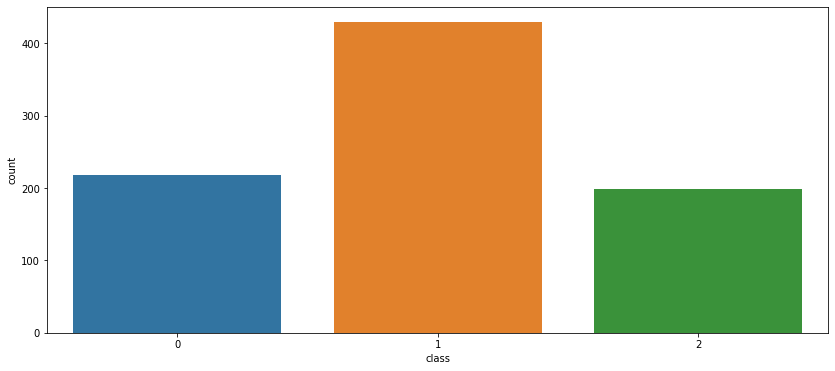

In [160]:
plt.figure(figsize=(14,6))
sns.countplot(df_car['class'])

# Target column looks quite balanced

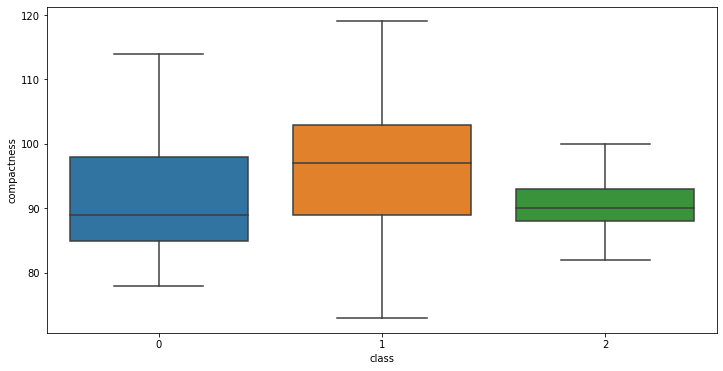

In [161]:
plt.figure(figsize=(12,6))
sns.boxplot(x="class", y="compactness", data=df_car)

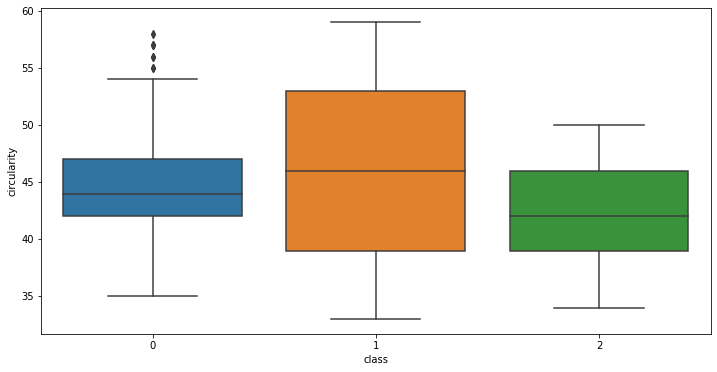

In [162]:
plt.figure(figsize=(12,6))
sns.boxplot(x="class", y="circularity", data=df_car)

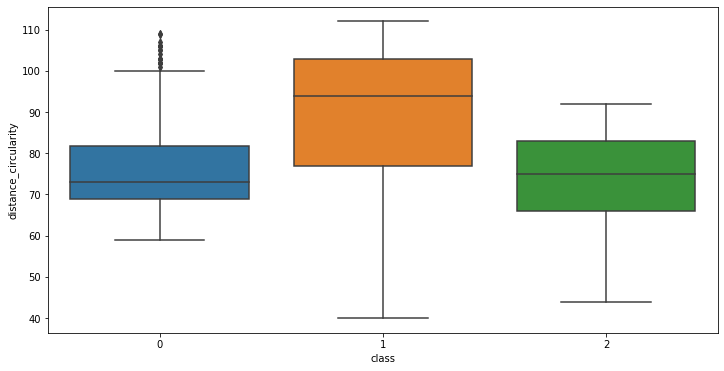

In [163]:
plt.figure(figsize=(12,6))
sns.boxplot(x="class", y="distance_circularity", data=df_car)

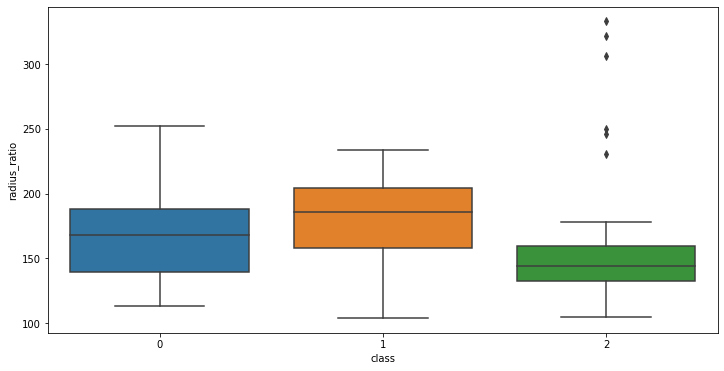

In [164]:
plt.figure(figsize=(12,6))
sns.boxplot(x="class", y="radius_ratio", data=df_car)

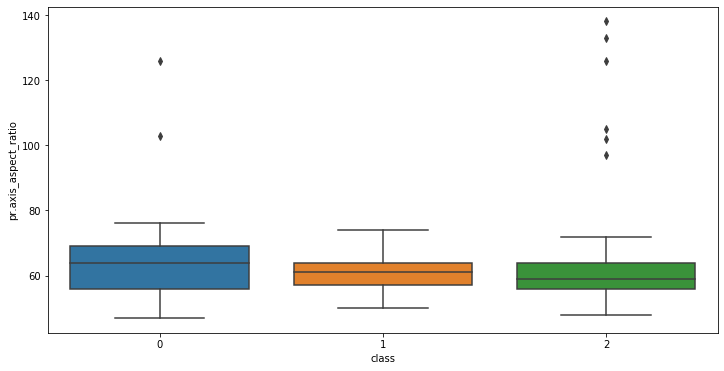

In [165]:
plt.figure(figsize=(12,6))
sns.boxplot(x="class", y="pr.axis_aspect_ratio", data=df_car)

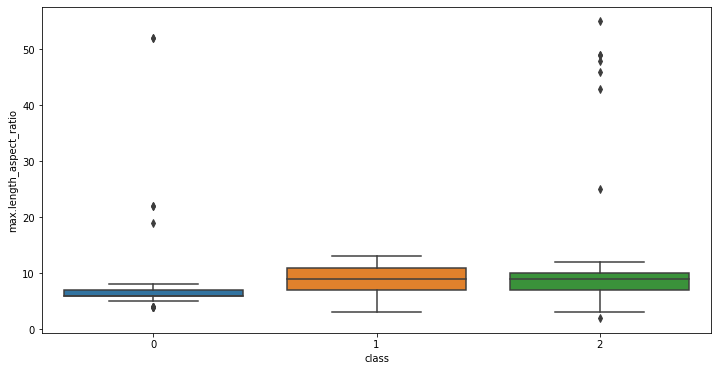

In [166]:
plt.figure(figsize=(12,6))
sns.boxplot(x="class", y="max.length_aspect_ratio", data=df_car)

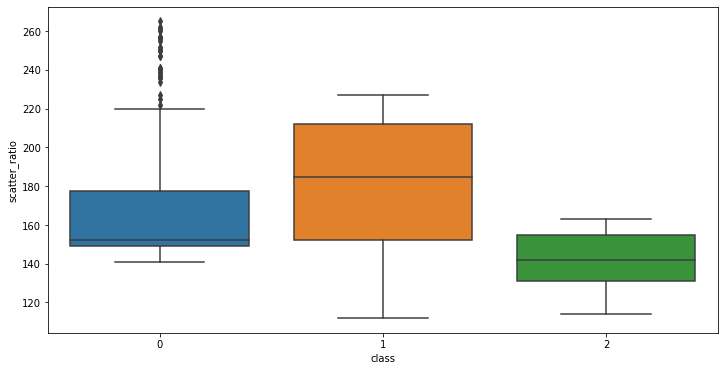

In [167]:
plt.figure(figsize=(12,6))
sns.boxplot(x="class", y="scatter_ratio", data=df_car)

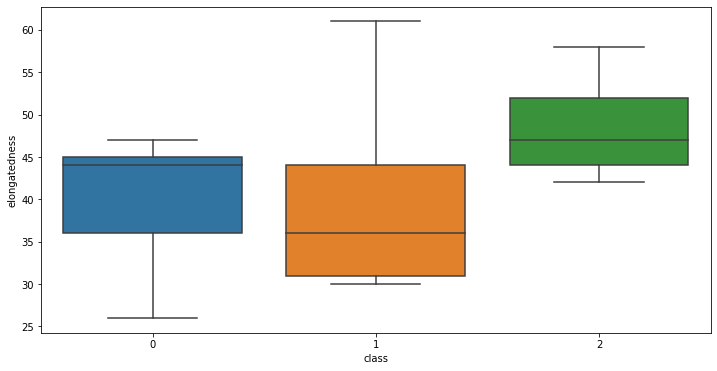

In [168]:
plt.figure(figsize=(12,6))
sns.boxplot(x="class", y="elongatedness", data=df_car)

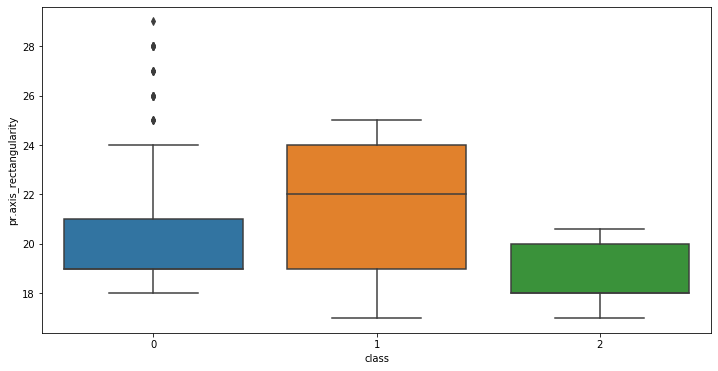

In [323]:
plt.figure(figsize=(12,6))
sns.boxplot(x="class", y="pr.axis_rectangularity", data=df_car)

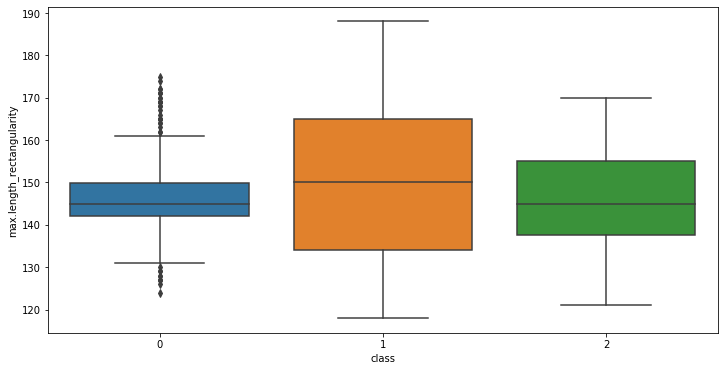

In [324]:
plt.figure(figsize=(12,6))
sns.boxplot(x="class", y="max.length_rectangularity", data=df_car)

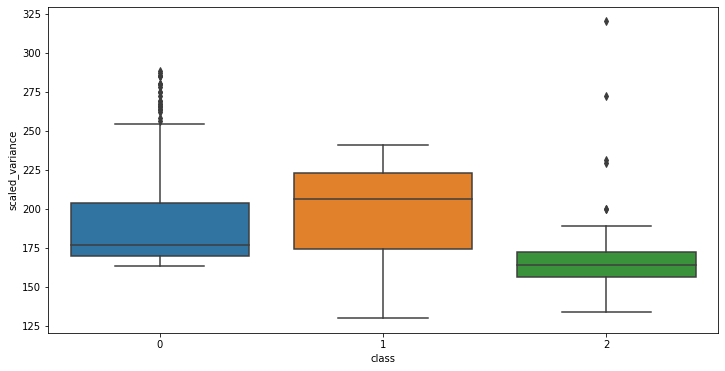

In [325]:
plt.figure(figsize=(12,6))
sns.boxplot(x="class", y="scaled_variance", data=df_car)

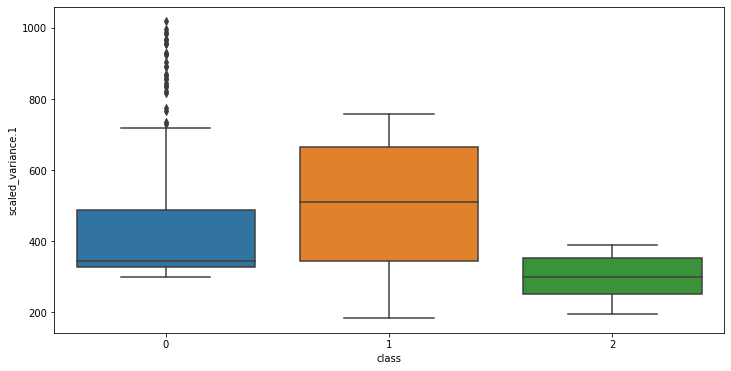

In [326]:
plt.figure(figsize=(12,6))
sns.boxplot(x="class", y="scaled_variance.1", data=df_car)

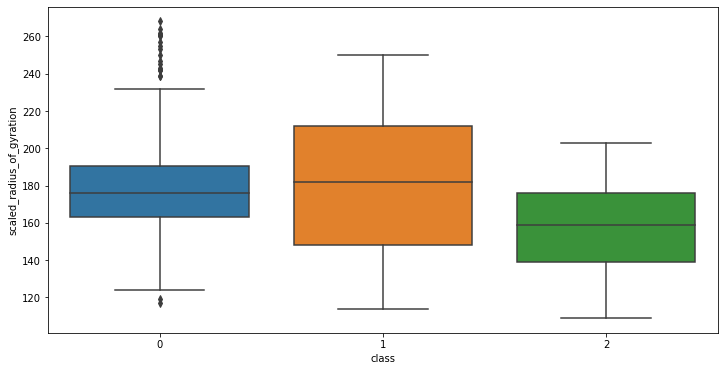

In [327]:
plt.figure(figsize=(12,6))
sns.boxplot(x="class", y="scaled_radius_of_gyration", data=df_car)

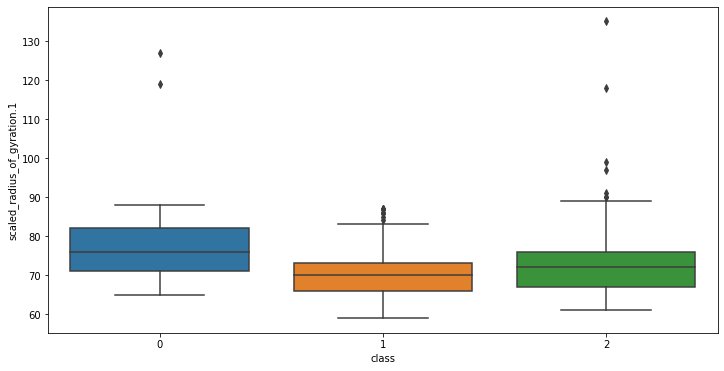

In [328]:
plt.figure(figsize=(12,6))
sns.boxplot(x="class", y="scaled_radius_of_gyration.1", data=df_car)

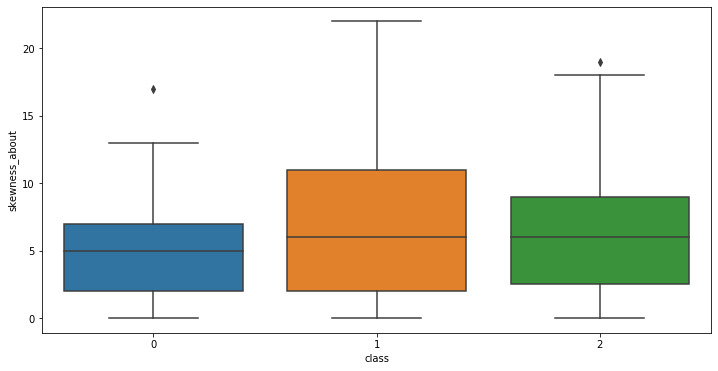

In [329]:
plt.figure(figsize=(12,6))
sns.boxplot(x="class", y="skewness_about", data=df_car)

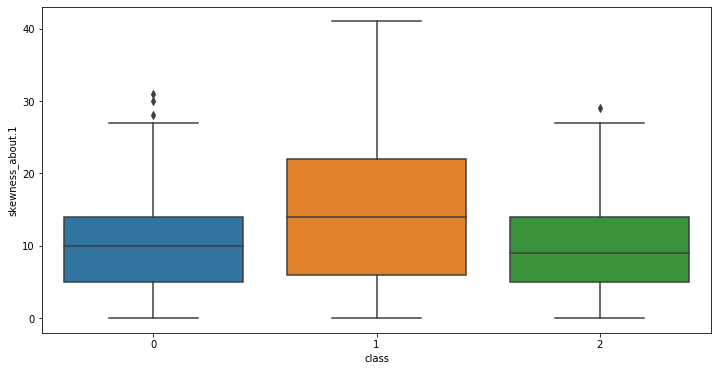

In [330]:
plt.figure(figsize=(12,6))
sns.boxplot(x="class", y="skewness_about.1", data=df_car)

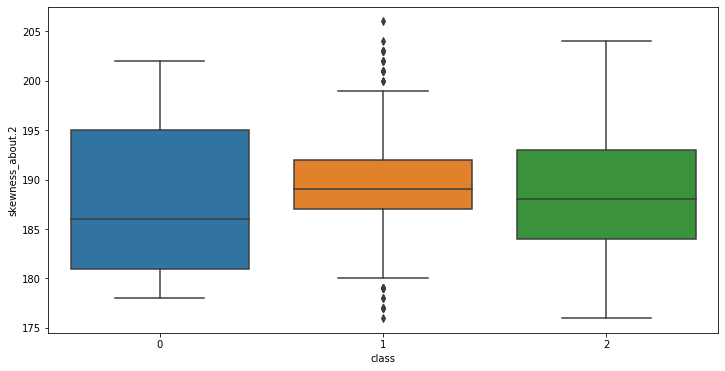

In [331]:
plt.figure(figsize=(12,6))
sns.boxplot(x="class", y="skewness_about.2", data=df_car)

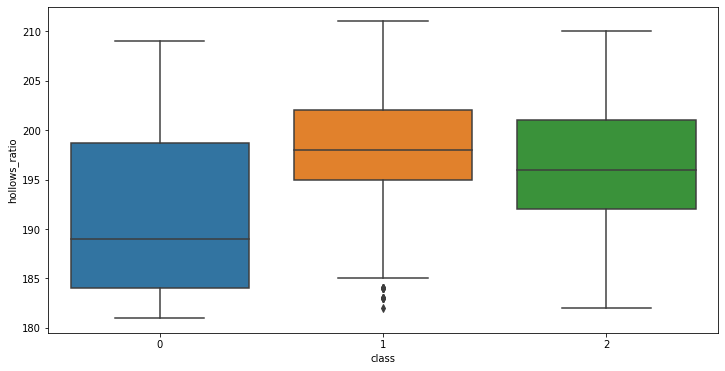

In [332]:
plt.figure(figsize=(12,6))
sns.boxplot(x="class", y="hollows_ratio", data=df_car)

Text(0.5, 1, 'Heatmap showing correlations between numerical data')

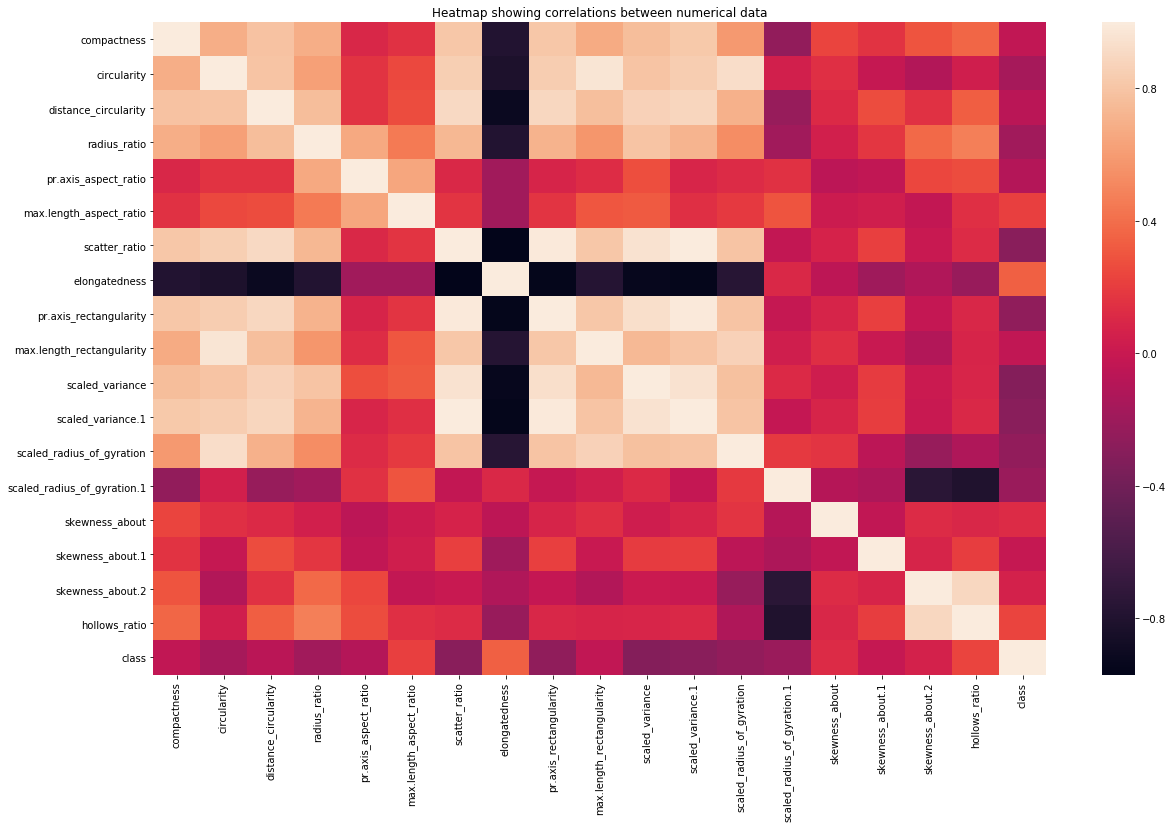

In [333]:
plt.figure(figsize=(20,12))  
sns.heatmap(df_car.corr())# Check for correlation of variable
plt.title('Heatmap showing correlations between numerical data')

In [334]:
# Check for correlation of variable
df_car.corr(method='pearson')

compactness  circularity  distance_circularity  \
compactness                     1.000000     0.685421              0.789909   
circularity                     0.685421     1.000000              0.793016   
distance_circularity            0.789909     0.793016              1.000000   
radius_ratio                    0.689840     0.620967              0.767079   
pr.axis_aspect_ratio            0.091704     0.153362              0.158397   
max.length_aspect_ratio         0.148249     0.251208              0.264550   
scatter_ratio                   0.812235     0.848207              0.904400   
elongatedness                  -0.788643    -0.821901             -0.911435   
pr.axis_rectangularity          0.813636     0.844972              0.893128   
max.length_rectangularity       0.676143     0.961943              0.774669   
scaled_variance                 0.762770     0.796822              0.861980   
scaled_variance.1               0.815901     0.838525              0.887328   
scaled_radius_of_gyration       0.585156     0.926888              0.705953   
scaled_radius_of_gyration.1    -0.250071     0.052642             -0.225852   
skewness_about                  0.235687     0.144394              0.113813   
skewness_about.1                0.157387    -0.011851              0.265553   
skewness_about.2                0.298526    -0.105645              0.145563   
hollows_ratio                   0.365552     0.045318              0.332095   
class                          -0.033796    -0.159804             -0.064902   

                             radius_ratio  pr.axis_aspect_ratio  \
compactness                      0.689840              0.091704   
circularity                      0.620967              0.153362   
distance_circularity             0.767079              0.158397   
radius_ratio                     1.000000              0.663559   
pr.axis_aspect_ratio             0.663559              1.000000   
max.length_aspect_ratio          0.450036              0.648704   
scatter_ratio                    0.734228              0.103715   
elongatedness                   -0.789795             -0.183264   
pr.axis_rectangularity           0.708285              0.079395   
max.length_rectangularity        0.569205              0.127128   
scaled_variance                  0.794041              0.273414   
scaled_variance.1                0.720150              0.089620   
scaled_radius_of_gyration        0.536536              0.122111   
scaled_radius_of_gyration.1     -0.180819              0.152776   
skewness_about                   0.048720             -0.058481   
skewness_about.1                 0.173832             -0.032134   
skewness_about.2                 0.382129              0.239849   
hollows_ratio                    0.471262              0.267724   
class                           -0.182270             -0.098318   

                             max.length_aspect_ratio  scatter_ratio  \
compactness                                 0.148249       0.812235   
circularity                                 0.251208       0.848207   
distance_circularity                        0.264550       0.904400   
radius_ratio                                0.450036       0.734228   
pr.axis_aspect_ratio                        0.648704       0.103715   
max.length_aspect_ratio                     1.000000       0.165967   
scatter_ratio                               0.165967       1.000000   
elongatedness                              -0.180041      -0.970723   
pr.axis_rectangularity                      0.161592       0.989370   
max.length_rectangularity                   0.305943       0.808356   
scaled_variance                             0.318955       0.948296   
scaled_variance.1                           0.143713       0.993784   
scaled_radius_of_gyration                   0.189704       0.799266   
scaled_radius_of_gyration.1                 0.295574      -0.027985   
skewness_about                            

In [335]:
# Target variable shows low correlation with most of the variables

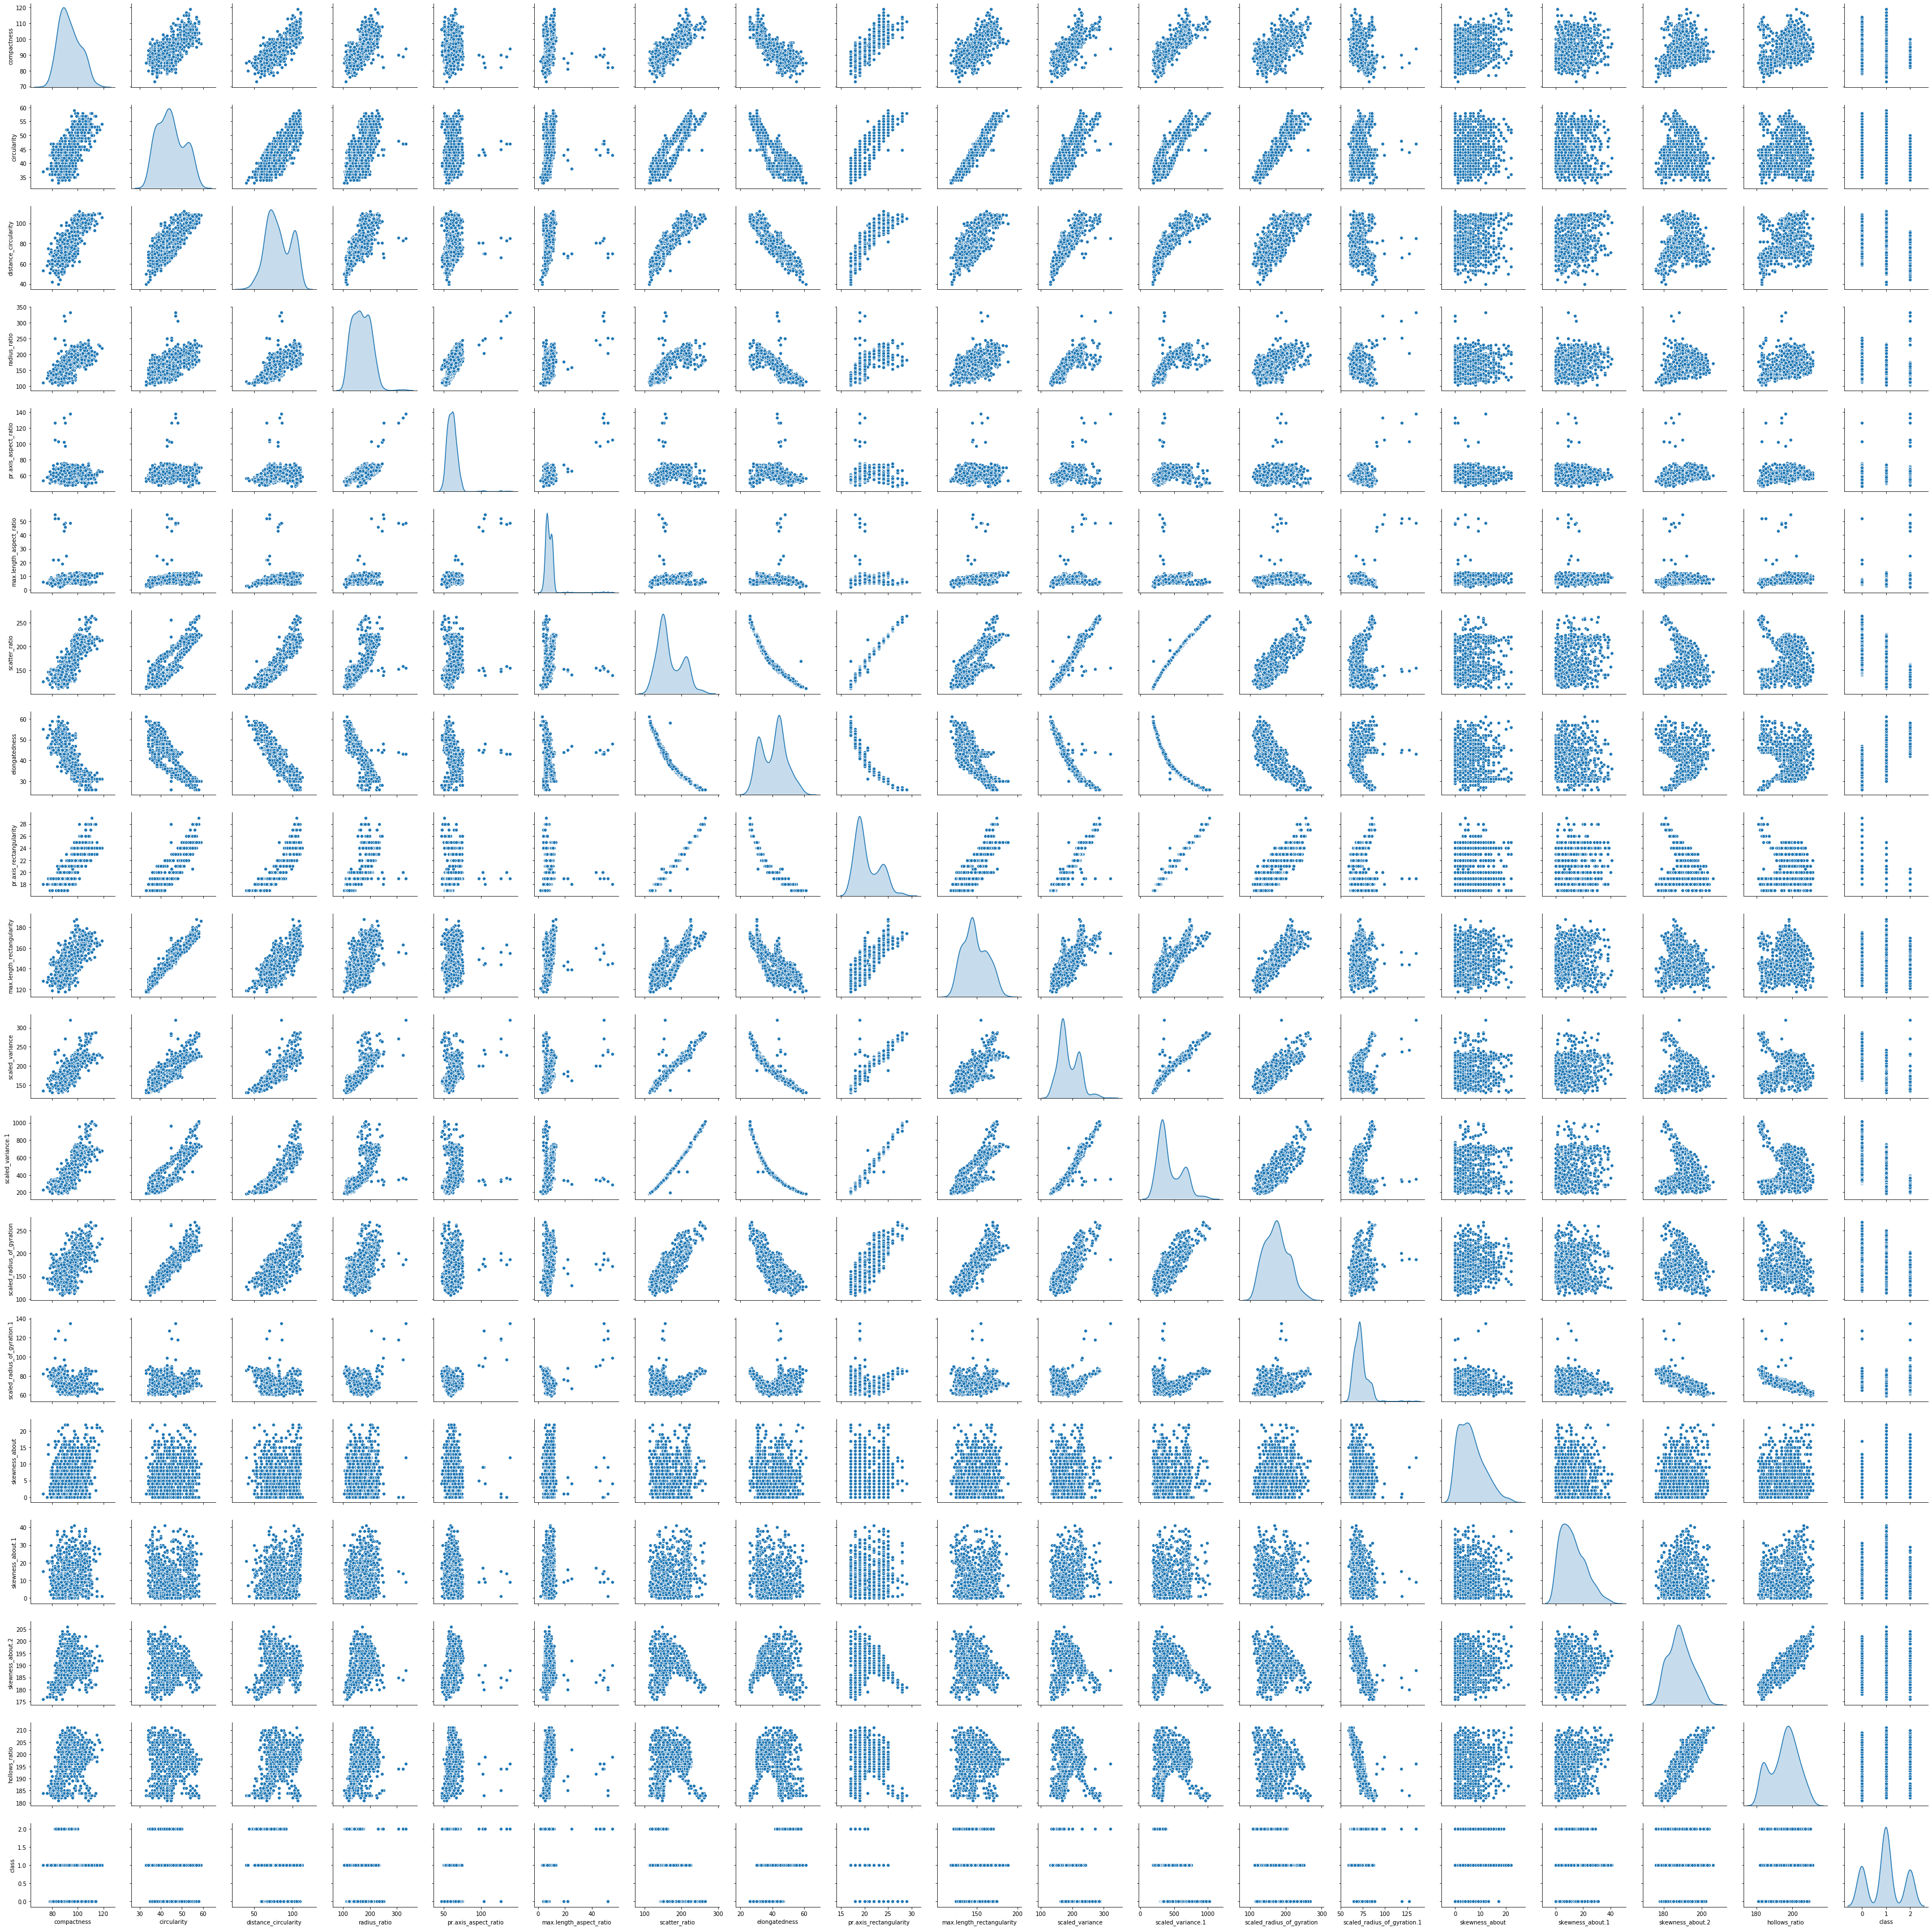

In [336]:
sns.pairplot(df_car,diag_kind='kde')

### Defining Custom functions

In [171]:
# Defining grid search function

def grid_search(clf, parameters, X, y, n_jobs= -1, n_folds=4, score_func=None):
    if score_func:
        gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds, n_jobs=n_jobs, scoring=score_func,verbose =2)
    else:
        print('Doing grid search')
        gs = GridSearchCV(clf, param_grid=parameters, n_jobs=n_jobs, cv=n_folds, verbose =1)
    gs.fit(X, y)
    print("mean test score (weighted by split size) of CV rounds: ",gs.cv_results_['mean_test_score'] )
    print ("Best parameter set", gs.best_params_, "Corresponding mean CV score",gs.best_score_)
    best = gs.best_estimator_
    return best

In [172]:
# Defining show_classifier_metrics function for better visualization of data

def show_classifier_metrics(clf, y_train=y_train,y_test=y_test, print_classification_report=True, print_confusion_matrix=True):
    print(clf)
    if print_confusion_matrix:
        print('confusion matrix of training data')
        print(metrics.confusion_matrix(y_train, clf.predict(X_train)))
        print('confusion matrix of test data')
        print(metrics.confusion_matrix(y_test, clf.predict(X_test)))
    if print_classification_report:
        print('classification report of test data')
        print(metrics.classification_report(y_test, clf.predict(X_test)))
    print('Accuracy on test data: %f%%' % (metrics.accuracy_score(y_test, clf.predict(X_test))*100))
    print('Accuracy on training data: %f%%' % (metrics.accuracy_score(y_train, clf.predict(X_train))*100))
    print('Area under the ROC curve : %f' % (metrics.roc_auc_score(y_test, clf.predict(X_test))))

### Analyzing Outliers

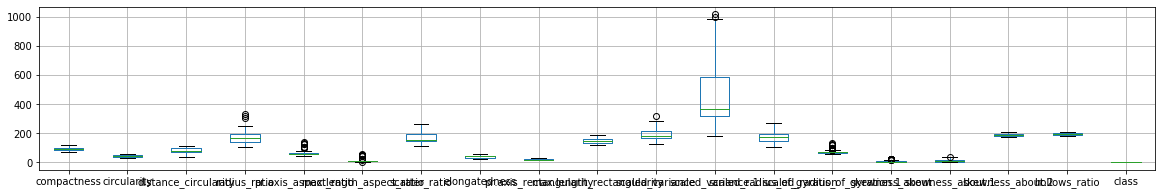

In [23]:
df_car.boxplot(figsize=(20,3))

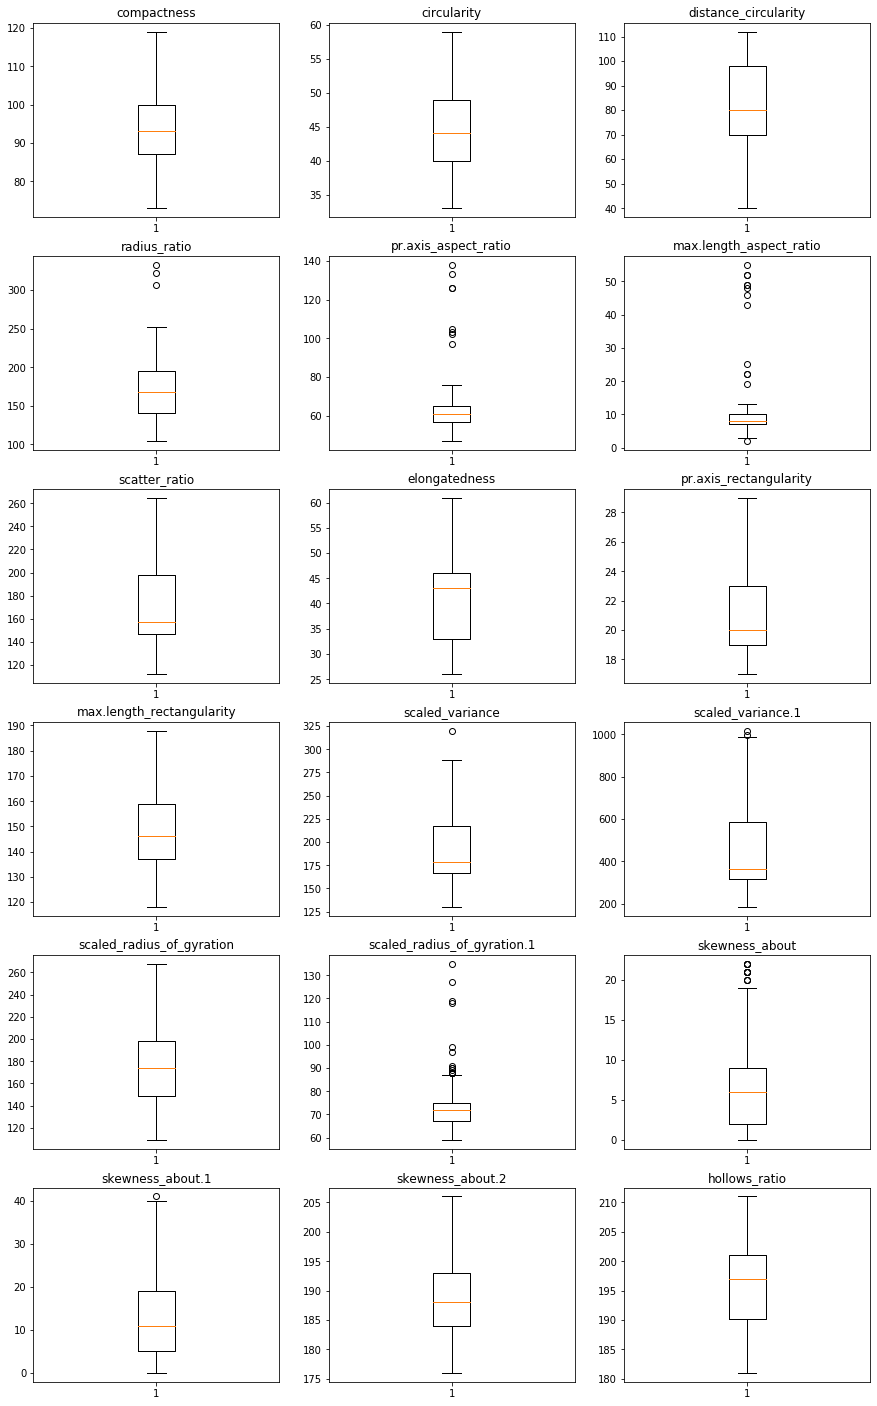

In [24]:
fig, axs = plt.subplots(6, 3, figsize = (15,25))

axs[0, 0].boxplot(df_car.compactness)
axs[0, 0].set_title('compactness')

axs[0, 1].boxplot(df_car.circularity)
axs[0, 1].set_title('circularity')

axs[0, 2].boxplot(df_car.distance_circularity)
axs[0, 2].set_title('distance_circularity')

axs[1, 0].boxplot(df_car.radius_ratio)
axs[1, 0].set_title('radius_ratio')

axs[1, 1].boxplot(df_car['pr.axis_aspect_ratio'])
axs[1, 1].set_title('pr.axis_aspect_ratio')

axs[1, 2].boxplot(df_car['max.length_aspect_ratio'])
axs[1, 2].set_title('max.length_aspect_ratio')

axs[2, 0].boxplot(df_car.scatter_ratio)
axs[2, 0].set_title('scatter_ratio')

axs[2, 1].boxplot(df_car.elongatedness)
axs[2, 1].set_title('elongatedness')

axs[2, 2].boxplot(df_car['pr.axis_rectangularity'])
axs[2, 2].set_title('pr.axis_rectangularity')

axs[3, 0].boxplot(df_car['max.length_rectangularity'])
axs[3, 0].set_title('max.length_rectangularity')

axs[3, 1].boxplot(df_car.scaled_variance)
axs[3, 1].set_title('scaled_variance')

axs[3, 2].boxplot(df_car['scaled_variance.1'])
axs[3, 2].set_title('scaled_variance.1')

axs[4, 0].boxplot(df_car.scaled_radius_of_gyration)
axs[4, 0].set_title('scaled_radius_of_gyration')

axs[4, 1].boxplot(df_car['scaled_radius_of_gyration.1'])
axs[4, 1].set_title('scaled_radius_of_gyration.1')

axs[4, 2].boxplot(df_car.skewness_about)
axs[4, 2].set_title('skewness_about')

axs[5, 0].boxplot(df_car['skewness_about.1'])
axs[5, 0].set_title('skewness_about.1')

axs[5, 1].boxplot(df_car['skewness_about.2'])
axs[5, 1].set_title('skewness_about.2')

axs[5, 2].boxplot(df_car.hollows_ratio)
axs[5, 2].set_title('hollows_ratio')

plt.show()

### Using SVM on this dataset without treating the outliers

In [425]:
# Drop class variables
data_new = df_car.drop(['class'], axis =1)

data_new.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio  
0             187.0            197  
1             189.0            199  
2             188.0            196  
3             199.0            207  
4             180.0            183

In [426]:
# All variables are on same scale, hence we can omit scaling.
# But to standardize the process we will do it here

data_new_z = data_new.apply(zscore)
data_new_z.head()

compactness  circularity  distance_circularity  radius_ratio  \
0     0.160580     0.517302              0.056545      0.272965   
1    -0.325470    -0.624564              0.120112     -0.835442   
2     1.254193     0.843549              1.518571      1.201630   
3    -0.082445    -0.624564             -0.007021     -0.296217   
4    -1.054545    -0.135193             -0.769817      1.081803   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              1.310206                 0.311542      -0.208038   
1             -0.593962                 0.094079      -0.599893   
2              0.548539                 0.311542       1.148382   
3              0.167705                 0.094079      -0.750606   
4              5.245485                 9.444962      -0.599893   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0       0.136580               -0.225160                   0.758332   
1       0.520853               -0.611739                  -0.344578   
2      -1.144331                0.934576                   0.689401   
3       0.648945               -0.611739                  -0.344578   
4       0.520853               -0.611739                  -0.275646   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0        -0.403077          -0.343028                   0.285618   
1        -0.594546          -0.620879                  -0.513719   
2         1.096764           1.108603                   1.392391   
3        -0.913661          -0.739958                  -1.466773   
4         1.671171          -0.649231                   0.408593   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                    -0.327938       -0.074340          0.380665   
1                    -0.059987        0.537873          0.156589   
2                     0.073989        1.558230         -0.403603   
3                    -1.265769       -0.074340         -0.291565   
4                     7.308682        0.537873         -0.179527   

   skewness_about.2  hollows_ratio  
0         -0.312193       0.183957  
1          0.013088       0.452977  
2         -0.149552       0.049447  
3          1.639494       1.529056  
4         -1.450677      -1.699181

In [427]:
df_car['class'] = df_car['class'].astype(int) 

X = data_new_z
y = df_car['class']

In [428]:
X_train, y_train, X_test, y_test = train_test_split(X, y, test_size = 0.3, random_state = 11)

In [429]:
svm = SVC(random_state = 11)
svm.fit(X_train, X_test)
print(svm.score(X_train, X_test))
print(svm.score(y_train, y_test))

0.972972972972973
0.9645669291338582


D:\PGP-AIML\Python_Installation\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [430]:
col_names =  ['Model Type', 'Training Score', 'Test Score']
model_comparison  = pd.DataFrame(columns = col_names)
model_comparison

Empty DataFrame
Columns: [Model Type, Training Score, Test Score]
Index: []

In [431]:
model_comparison.loc[len(model_comparison)] = 'SVM Model with outlier treatment and dropping features', round(svm.score(X_train, X_test)*100,2), round(svm.score(y_train, y_test)*100,2)

In [432]:
svm = SVC(C= .01, kernel='linear',random_state = 11)
svm.fit(X_train, X_test)
print(svm.score(X_train, X_test))
print(svm.score(y_train, y_test))

0.8699324324324325
0.8464566929133859


In [433]:
svm = SVC(C= .05, kernel='linear',random_state = 11)
svm.fit(X_train, X_test)
print(svm.score(X_train, X_test))
print(svm.score(y_train, y_test))

0.9138513513513513
0.8976377952755905


In [434]:
svm = SVC(C= .5, kernel='linear',random_state = 11)
svm.fit(X_train, X_test)
print(svm.score(X_train, X_test))
print(svm.score(y_train, y_test))

0.956081081081081
0.937007874015748


In [435]:
svm = SVC(kernel='rbf',random_state = 11)
svm.fit(X_train, X_test)
print(svm.score(X_train, X_test))
print(svm.score(y_train, y_test))

0.972972972972973
0.9645669291338582


D:\PGP-AIML\Python_Installation\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [436]:
params = {'C': [0.01, 0.05, 0.5, 1], 'kernel': ['linear', 'rbf'], 'gamma' :['auto']}

In [437]:
svm_gs = GridSearchCV(SVC(),param_grid = params, cv = 5, scoring = 'accuracy')
svm_gs.fit(X_train, X_test)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.01, 0.05, 0.5, 1], 'gamma': ['auto'],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [438]:
svm_gs.best_estimator_.kernel

'rbf'

In [439]:
svm_gs.best_score_

0.9527027027027027

In [440]:
svm_gs.best_estimator_.C

1

In [441]:
svm_gs.score(X_train, X_test)

0.972972972972973

In [442]:
svm_gs.score(y_train, y_test)

0.9645669291338582

In [443]:
model_comparison.loc[len(model_comparison)] = 'SVM Model without outlier treatment and GridSearch', round(svm_gs.score(X_train, X_test)*100,2), round(svm_gs.score(y_train, y_test)*100,2)

### Performing SVM by dropping few features on data with outliers

In [444]:
X_drop = data_new.drop(['circularity','distance_circularity','scatter_ratio','elongatedness','max.length_aspect_ratio','scaled_variance','scaled_variance.1'], axis = 1)

In [445]:
# We found a number of features to have dependencies on each other, we are removing a seven of them.

X_std_drop = X_drop.apply(zscore)
X_std_drop.head()

compactness  radius_ratio  pr.axis_aspect_ratio  pr.axis_rectangularity  \
0     0.160580      0.272965              1.310206               -0.225160   
1    -0.325470     -0.835442             -0.593962               -0.611739   
2     1.254193      1.201630              0.548539                0.934576   
3    -0.082445     -0.296217              0.167705               -0.611739   
4    -1.054545      1.081803              5.245485               -0.611739   

   max.length_rectangularity  scaled_radius_of_gyration  \
0                   0.758332                   0.285618   
1                  -0.344578                  -0.513719   
2                   0.689401                   1.392391   
3                  -0.344578                  -1.466773   
4                  -0.275646                   0.408593   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                    -0.327938       -0.074340          0.380665   
1                    -0.059987        0.537873          0.156589   
2                     0.073989        1.558230         -0.403603   
3                    -1.265769       -0.074340         -0.291565   
4                     7.308682        0.537873         -0.179527   

   skewness_about.2  hollows_ratio  
0         -0.312193       0.183957  
1          0.013088       0.452977  
2         -0.149552       0.049447  
3          1.639494       1.529056  
4         -1.450677      -1.699181

In [446]:
X_train, y_train, X_test, y_test = train_test_split(X_std_drop, y, test_size = 0.3, random_state = 11)

In [447]:
svm = SVC(random_state = 11)
svm.fit(X_train, X_test)
print(svm.score(X_train, X_test))
print(svm.score(y_train, y_test))

0.9662162162162162
0.9409448818897638


D:\PGP-AIML\Python_Installation\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [448]:
model_comparison.loc[len(model_comparison)] = 'SVM Model without outlier treatment and dropping features', round(svm.score(X_train, X_test)*100,2), round(svm.score(y_train, y_test)*100,2)

In [449]:
svm = SVC(C= .01, kernel='linear',random_state = 11)
svm.fit(X_train, X_test)
print(svm.score(X_train, X_test))
print(svm.score(y_train, y_test))

0.7753378378378378
0.7598425196850394


In [450]:
svm = SVC(C= .05, kernel='linear',random_state = 11)
svm.fit(X_train, X_test)
print(svm.score(X_train, X_test))
print(svm.score(y_train, y_test))

0.9087837837837838
0.8818897637795275


In [451]:
svm = SVC(C= .5, kernel='linear',random_state = 11)
svm.fit(X_train, X_test)
print(svm.score(X_train, X_test))
print(svm.score(y_train, y_test))

0.9341216216216216
0.9251968503937008


In [452]:
svm = SVC(kernel='rbf',random_state = 11)
svm.fit(X_train, X_test)
print(svm.score(X_train, X_test))
print(svm.score(y_train, y_test))

0.9662162162162162
0.9409448818897638


D:\PGP-AIML\Python_Installation\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [453]:
svm_gs = GridSearchCV(SVC(),param_grid = params, cv = 5, scoring = 'accuracy')
svm_gs.fit(X_train, X_test)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.01, 0.05, 0.5, 1], 'gamma': ['auto'],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [454]:
svm_gs.best_score_

0.9476351351351351

In [455]:
svm_gs.best_estimator_.C

1

In [456]:
svm_gs.best_estimator_.kernel

'rbf'

In [457]:
svm_gs.score(X_train, X_test)

0.9662162162162162

In [458]:
svm_gs.score(y_train, y_test)

0.9409448818897638

In [459]:
model_comparison.loc[len(model_comparison)] = 'SVM Model without outlier treatment, dropping features and GridSearch', round(svm_gs.score(X_train, X_test)*100,2), round(svm_gs.score(y_train, y_test)*100,2)

# Performing PCA on data without outlier treatment

In [460]:
pca = PCA(n_components = 18)
pca.fit(data_new_z)

PCA(copy=True, iterated_power='auto', n_components=18, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [461]:
print(pca.explained_variance_)

[9.40828822e+00 3.01605477e+00 1.90347881e+00 1.18027268e+00
 9.17174067e-01 5.39279825e-01 3.58566463e-01 2.21661730e-01
 1.60036194e-01 9.17140864e-02 6.65751851e-02 4.59556829e-02
 3.54023825e-02 2.67096104e-02 2.03690624e-02 1.74414127e-02
 9.23357029e-03 3.08801865e-03]


In [462]:
print(pca.components_)

[[ 2.75259459e-01  2.93392341e-01  3.04556452e-01  2.67593206e-01
   8.04938998e-02  9.72198560e-02  3.16872006e-01 -3.14042361e-01
   3.13953009e-01  2.82790417e-01  3.09310530e-01  3.14149034e-01
   2.72002525e-01 -2.09179819e-02  4.13316728e-02  5.83331566e-02
   3.01560495e-02  7.40813666e-02]
 [-1.27010856e-01  1.26217125e-01 -7.26862818e-02 -1.89635192e-01
  -1.22158741e-01  1.07277825e-02  4.80473095e-02  1.27991503e-02
   6.00351423e-02  1.16182501e-01  6.17536908e-02  5.32757796e-02
   2.09279660e-01  4.88541866e-01 -5.49212020e-02 -1.24152855e-01
  -5.40947666e-01 -5.40279812e-01]
 [-1.19874162e-01 -2.51835016e-02 -5.60058748e-02  2.75066087e-01
   6.42046458e-01  5.91799912e-01 -9.76530949e-02  5.74645766e-02
  -1.09509169e-01 -1.69994013e-02  5.64656174e-02 -1.08711428e-01
  -3.13685232e-02  2.86211092e-01 -1.15693651e-01 -7.54878378e-02
   8.68929277e-03  3.95143108e-02]
 [ 7.83109159e-02  1.87525528e-01 -7.07959698e-02 -4.22567515e-02
   3.28577853e-02  3.13199694e-02 -9.

In [463]:
print(pca.explained_variance_ratio_)

[5.22064851e-01 1.67360538e-01 1.05623824e-01 6.54931979e-02
 5.08938854e-02 2.99245766e-02 1.98968125e-02 1.22999843e-02
 8.88039031e-03 5.08920430e-03 3.69424950e-03 2.55007565e-03
 1.96447421e-03 1.48211326e-03 1.13027697e-03 9.67822019e-04
 5.12369772e-04 1.71353806e-04]


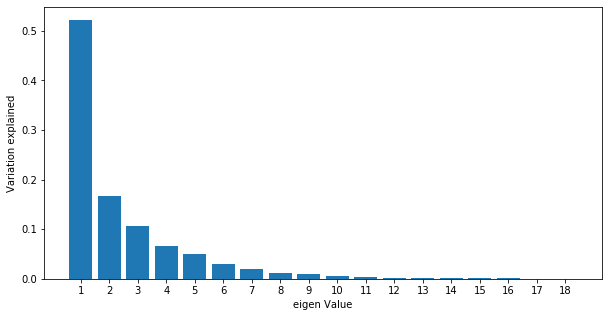

In [464]:
plt.figure(figsize = (10,5))
plt.bar(list(range(1,19)),pca.explained_variance_ratio_,tick_label=range(1,19), align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

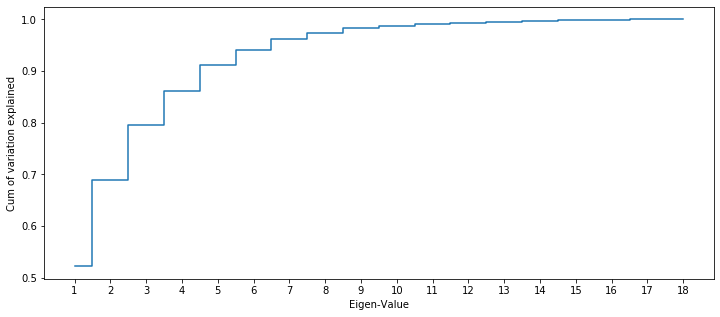

In [465]:
plt.figure(figsize = (12,5))
plt.xticks(np.arange(0,19))
plt.step(list(range(1,19)),np.cumsum(pca.explained_variance_ratio_), where = 'mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('Eigen-Value')
plt.show()

In [466]:
pca8 = PCA(n_components = 8)
pca8.fit(data_new_z)

PCA(copy=True, iterated_power='auto', n_components=8, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [467]:
print(pca8.components_)

[[ 2.75259459e-01  2.93392341e-01  3.04556452e-01  2.67593206e-01
   8.04938998e-02  9.72198560e-02  3.16872006e-01 -3.14042361e-01
   3.13953009e-01  2.82790417e-01  3.09310530e-01  3.14149034e-01
   2.72002525e-01 -2.09179819e-02  4.13316728e-02  5.83331566e-02
   3.01560495e-02  7.40813666e-02]
 [-1.27010856e-01  1.26217125e-01 -7.26862818e-02 -1.89635192e-01
  -1.22158741e-01  1.07277825e-02  4.80473095e-02  1.27991503e-02
   6.00351423e-02  1.16182501e-01  6.17536908e-02  5.32757796e-02
   2.09279660e-01  4.88541866e-01 -5.49212020e-02 -1.24152855e-01
  -5.40947666e-01 -5.40279812e-01]
 [-1.19874162e-01 -2.51835016e-02 -5.60058748e-02  2.75066087e-01
   6.42046458e-01  5.91799912e-01 -9.76530949e-02  5.74645766e-02
  -1.09509169e-01 -1.69994013e-02  5.64656174e-02 -1.08711428e-01
  -3.13685232e-02  2.86211092e-01 -1.15693651e-01 -7.54878378e-02
   8.68929277e-03  3.95143108e-02]
 [ 7.83109159e-02  1.87525528e-01 -7.07959698e-02 -4.22567515e-02
   3.28577853e-02  3.13199694e-02 -9.

In [468]:
print(pca8.explained_variance_ratio_)

[0.52206485 0.16736054 0.10562382 0.0654932  0.05089389 0.02992458
 0.01989681 0.01229998]


In [469]:
Xpca8 = pca8.transform(data_new_z)

In [470]:
X_train, y_train, X_test, y_test = train_test_split(Xpca8, y, test_size = 0.3, random_state = 11)

In [471]:
svm = SVC(random_state = 11)
svm.fit(X_train, X_test)
print(svm.score(X_train, X_test))
print(svm.score(y_train, y_test))

0.9712837837837838
0.9488188976377953


D:\PGP-AIML\Python_Installation\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [472]:
model_comparison.loc[len(model_comparison)] = 'SVM Model without outlier treatment and PCA', round(svm.score(X_train, X_test)*100,2), round(svm.score(y_train, y_test)*100,2)

In [473]:
svm = SVC(C= .01, kernel='linear',random_state = 11)
svm.fit(X_train, X_test)
print(svm.score(X_train, X_test))
print(svm.score(y_train, y_test))

0.8175675675675675
0.7952755905511811


In [474]:
svm = SVC(C= .05, kernel='linear',random_state = 11)
svm.fit(X_train, X_test)
print(svm.score(X_train, X_test))
print(svm.score(y_train, y_test))

0.8716216216216216
0.8582677165354331


In [475]:
svm = SVC(C= .5, kernel='linear',random_state = 11)
svm.fit(X_train, X_test)
print(svm.score(X_train, X_test))
print(svm.score(y_train, y_test))

0.8834459459459459
0.8740157480314961


In [476]:
svm = SVC(kernel='rbf',random_state = 11)
svm.fit(X_train, X_test)
print(svm.score(X_train, X_test))
print(svm.score(y_train, y_test))

0.9712837837837838
0.9488188976377953


D:\PGP-AIML\Python_Installation\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [477]:
svm_gs = GridSearchCV(SVC(),param_grid = params, cv = 5, scoring = 'accuracy')
svm_gs.fit(X_train, X_test)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.01, 0.05, 0.5, 1], 'gamma': ['auto'],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [478]:
svm_gs.best_score_

0.9307432432432432

In [479]:
svm_gs.best_estimator_.C

1

In [480]:
svm_gs.best_estimator_.kernel

'rbf'

In [481]:
svm_gs.score(X_train, X_test)

0.9712837837837838

In [482]:
svm_gs.score(y_train, y_test)

0.9488188976377953

In [483]:
model_comparison.loc[len(model_comparison)] = 'SVM Model without outlier treatment, PCA and GridSearch', round(svm_gs.score(X_train, X_test)*100,2), round(svm_gs.score(y_train, y_test)*100,2)

### Outlier Treatment

In [484]:
df_car = pd.read_csv("vehicle.csv")

# Label encoder order is alphabetical
labelencoder_X = LabelEncoder()
df_car['class'] = labelencoder_X.fit_transform(df_car['class'])

# Replacing missing with Mean value 

df_car.fillna(df_car.mean(),inplace = True)

In [485]:
# Starting with the fresh dataset again

df_car.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio  class  
0             187.0            197      2  
1             189.0            199      2  
2             188.0            196      1  
3             199.0            207      2  
4             180.0            183      0

In [486]:
print('Radius Ratio above: ', df_car['radius_ratio'].quantile(q = 0.75) + 
                      1.5*(df_car['radius_ratio'].quantile(q = 0.75) - df_car['radius_ratio'].quantile(q = 0.25)), 'are outliers')

Radius Ratio above:  276.0 are outliers


In [487]:
print('Numerber of outliers: ', df_car[df_car['radius_ratio'] > 276]['radius_ratio'].count())
print('Number of clients: ', len(df_car))
#Outliers in %
print('Outliers are:', round(df_car[df_car['radius_ratio'] > 276]['radius_ratio'].count()*100/len(df_car),2), '%')

Numerber of outliers:  3
Number of clients:  846
Outliers are: 0.35 %


In [488]:
# Setting Radius Ratio outliers value to mean value

df_car[df_car['radius_ratio'] > 276] = 168.888095
df_car.head()

compactness  circularity  distance_circularity  radius_ratio  \
0         95.0         48.0                  83.0         178.0   
1         91.0         41.0                  84.0         141.0   
2        104.0         50.0                 106.0         209.0   
3         93.0         41.0                  82.0         159.0   
4         85.0         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                     10.0          162.0   
1                  57.0                      9.0          149.0   
2                  66.0                     10.0          207.0   
3                  63.0                      9.0          144.0   
4                 103.0                     52.0          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                      159.0   
1           45.0                    19.0                      143.0   
2           32.0                    23.0                      158.0   
3           46.0                    19.0                      143.0   
4           45.0                    19.0                      144.0   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio  class  
0             187.0          197.0    2.0  
1             189.0          199.0    2.0  
2             188.0          196.0    1.0  
3             199.0          207.0    2.0  
4             180.0          183.0    0.0

In [489]:
print('pr.axis_aspect_ratio above: ', df_car['pr.axis_aspect_ratio'].quantile(q = 0.75) + 
                      1.5*(df_car['pr.axis_aspect_ratio'].quantile(q = 0.75) - df_car['pr.axis_aspect_ratio'].quantile(q = 0.25)), 'are outliers')

pr.axis_aspect_ratio above:  77.0 are outliers


In [490]:
print('Numerber of outliers: ', df_car[df_car['pr.axis_aspect_ratio'] > 77]['pr.axis_aspect_ratio'].count())
print('Number of clients: ', len(df_car))
#Outliers in %
print('Outliers are:', round(df_car[df_car['pr.axis_aspect_ratio'] > 77]['pr.axis_aspect_ratio'].count()*100/len(df_car),2), '%')

Numerber of outliers:  8
Number of clients:  846
Outliers are: 0.95 %


In [491]:
# Setting pr.axis_aspect_ratio outliers value to mean value

df_car[df_car['pr.axis_aspect_ratio'] > 77] = 61.678910
df_car[df_car['pr.axis_aspect_ratio'] > 77]

Empty DataFrame
Columns: [compactness, circularity, distance_circularity, radius_ratio, pr.axis_aspect_ratio, max.length_aspect_ratio, scatter_ratio, elongatedness, pr.axis_rectangularity, max.length_rectangularity, scaled_variance, scaled_variance.1, scaled_radius_of_gyration, scaled_radius_of_gyration.1, skewness_about, skewness_about.1, skewness_about.2, hollows_ratio, class]
Index: []

In [492]:
print('max.length_aspect_ratio above: ', df_car['max.length_aspect_ratio'].quantile(q = 0.75) + 
                      1.5*(df_car['max.length_aspect_ratio'].quantile(q = 0.75) - df_car['max.length_aspect_ratio'].quantile(q = 0.25)), 'are outliers')

max.length_aspect_ratio above:  14.5 are outliers


In [493]:
print('Numerber of outliers: ', df_car[df_car['max.length_aspect_ratio'] > 14.5]['max.length_aspect_ratio'].count())
print('Number of clients: ', len(df_car))
#Outliers in %
print('Outliers are:', round(df_car[df_car['max.length_aspect_ratio'] > 14.5]['max.length_aspect_ratio'].count()*100/len(df_car),2), '%')

Numerber of outliers:  12
Number of clients:  846
Outliers are: 1.42 %


In [494]:
# Setting max.length_aspect_ratio outliers value to mean value

df_car[df_car['max.length_aspect_ratio'] > 14.5] = 8.567376
df_car[df_car['max.length_aspect_ratio'] > 14.5]

Empty DataFrame
Columns: [compactness, circularity, distance_circularity, radius_ratio, pr.axis_aspect_ratio, max.length_aspect_ratio, scatter_ratio, elongatedness, pr.axis_rectangularity, max.length_rectangularity, scaled_variance, scaled_variance.1, scaled_radius_of_gyration, scaled_radius_of_gyration.1, skewness_about, skewness_about.1, skewness_about.2, hollows_ratio, class]
Index: []

In [495]:
print('scaled_variance.1 above: ', df_car['scaled_variance.1'].quantile(q = 0.75) + 
                      1.5*(df_car['scaled_variance.1'].quantile(q = 0.75) - df_car['scaled_variance.1'].quantile(q = 0.25)), 'are outliers')

scaled_variance.1 above:  992.5 are outliers


In [496]:
print('Numerber of outliers: ', df_car[df_car['scaled_variance.1'] > 992.5]['scaled_variance.1'].count())
print('Number of clients: ', len(df_car))
#Outliers in %
print('Outliers are:', round(df_car[df_car['scaled_variance.1'] > 992.5]['scaled_variance.1'].count()*100/len(df_car),2), '%')

Numerber of outliers:  2
Number of clients:  846
Outliers are: 0.24 %


In [497]:
# Setting scaled_variance_1 outliers value to mean value

df_car[df_car['scaled_variance.1'] > 992.5] = 439.494076
df_car[df_car['scaled_variance.1'] > 992.5]

Empty DataFrame
Columns: [compactness, circularity, distance_circularity, radius_ratio, pr.axis_aspect_ratio, max.length_aspect_ratio, scatter_ratio, elongatedness, pr.axis_rectangularity, max.length_rectangularity, scaled_variance, scaled_variance.1, scaled_radius_of_gyration, scaled_radius_of_gyration.1, skewness_about, skewness_about.1, skewness_about.2, hollows_ratio, class]
Index: []

In [498]:
print('scaled_radius_of_gyration above: ', df_car['scaled_radius_of_gyration.1'].quantile(q = 0.75) + 
                      1.5*(df_car['scaled_radius_of_gyration.1'].quantile(q = 0.75) - df_car['scaled_radius_of_gyration.1'].quantile(q = 0.25)), 'are outliers')

scaled_radius_of_gyration above:  87.0 are outliers


In [499]:
print('Numerber of outliers: ', df_car[df_car['scaled_radius_of_gyration.1'] > 87]['scaled_radius_of_gyration.1'].count())
print('Number of clients: ', len(df_car))
#Outliers in %
print('Outliers are:', round(df_car[df_car['scaled_radius_of_gyration.1'] > 87]['scaled_radius_of_gyration.1'].count()*100/len(df_car),2), '%')

Numerber of outliers:  8
Number of clients:  846
Outliers are: 0.95 %


In [500]:
# Setting scaled_radius_of_gyration outliers value to mean value

df_car[df_car['scaled_radius_of_gyration.1'] > 87] = 72.447743
df_car[df_car['scaled_radius_of_gyration.1'] > 87]

Empty DataFrame
Columns: [compactness, circularity, distance_circularity, radius_ratio, pr.axis_aspect_ratio, max.length_aspect_ratio, scatter_ratio, elongatedness, pr.axis_rectangularity, max.length_rectangularity, scaled_variance, scaled_variance.1, scaled_radius_of_gyration, scaled_radius_of_gyration.1, skewness_about, skewness_about.1, skewness_about.2, hollows_ratio, class]
Index: []

In [501]:
print('skewness_about above: ', df_car['skewness_about'].quantile(q = 0.75) + 
                      1.5*(df_car['skewness_about'].quantile(q = 0.75) - df_car['skewness_about'].quantile(q = 0.25)), 'are outliers')

skewness_about above:  19.5 are outliers


In [502]:
print('Numerber of outliers: ', df_car[df_car['skewness_about'] > 22]['skewness_about'].count())
print('Number of clients: ', len(df_car))
#Outliers in %
print('Outliers are:', round(df_car[df_car['skewness_about'] > 22]['skewness_about'].count()*100/len(df_car),2), '%')

Numerber of outliers:  8
Number of clients:  846
Outliers are: 0.95 %


In [503]:
# Setting skewness_about outliers value to mean value

df_car[df_car['skewness_about'] > 22] = 6.364286
df_car[df_car['skewness_about'] > 22]

Empty DataFrame
Columns: [compactness, circularity, distance_circularity, radius_ratio, pr.axis_aspect_ratio, max.length_aspect_ratio, scatter_ratio, elongatedness, pr.axis_rectangularity, max.length_rectangularity, scaled_variance, scaled_variance.1, scaled_radius_of_gyration, scaled_radius_of_gyration.1, skewness_about, skewness_about.1, skewness_about.2, hollows_ratio, class]
Index: []

In [504]:
print('skewness_about.1 above: ', df_car['skewness_about.1'].quantile(q = 0.75) + 
                      1.5*(df_car['skewness_about.1'].quantile(q = 0.75) - df_car['skewness_about.1'].quantile(q = 0.25)), 'are outliers')

skewness_about.1 above:  38.5 are outliers


In [505]:
print('Numerber of outliers: ', df_car[df_car['skewness_about.1'] > 38.5]['skewness_about.1'].count())
print('Number of clients: ', len(df_car))
#Outliers in %
print('Outliers are:', round(df_car[df_car['skewness_about.1'] > 38.5]['skewness_about.1'].count()*100/len(df_car),2), '%')

Numerber of outliers:  3
Number of clients:  846
Outliers are: 0.35 %


In [506]:
# Setting skewness_about outliers value to mean value

df_car[df_car['skewness_about.1'] > 38.5] = 12.602367
df_car[df_car['skewness_about.1'] > 38.5]

Empty DataFrame
Columns: [compactness, circularity, distance_circularity, radius_ratio, pr.axis_aspect_ratio, max.length_aspect_ratio, scatter_ratio, elongatedness, pr.axis_rectangularity, max.length_rectangularity, scaled_variance, scaled_variance.1, scaled_radius_of_gyration, scaled_radius_of_gyration.1, skewness_about, skewness_about.1, skewness_about.2, hollows_ratio, class]
Index: []

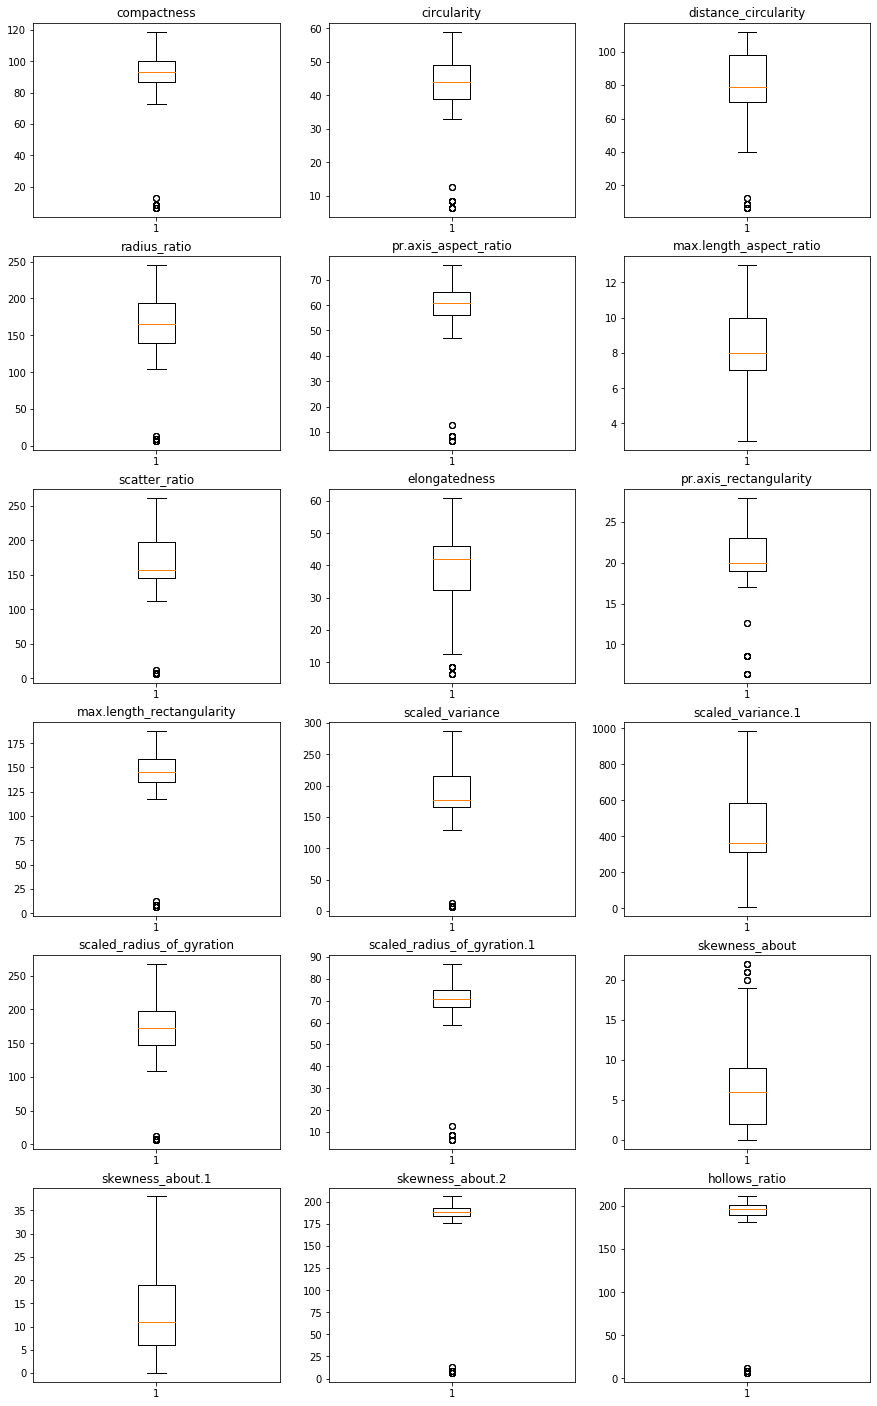

In [507]:
fig, axs = plt.subplots(6, 3, figsize = (15,25))

axs[0, 0].boxplot(df_car.compactness)
axs[0, 0].set_title('compactness')

axs[0, 1].boxplot(df_car.circularity)
axs[0, 1].set_title('circularity')

axs[0, 2].boxplot(df_car.distance_circularity)
axs[0, 2].set_title('distance_circularity')

axs[1, 0].boxplot(df_car.radius_ratio)
axs[1, 0].set_title('radius_ratio')

axs[1, 1].boxplot(df_car['pr.axis_aspect_ratio'])
axs[1, 1].set_title('pr.axis_aspect_ratio')

axs[1, 2].boxplot(df_car['max.length_aspect_ratio'])
axs[1, 2].set_title('max.length_aspect_ratio')

axs[2, 0].boxplot(df_car.scatter_ratio)
axs[2, 0].set_title('scatter_ratio')

axs[2, 1].boxplot(df_car.elongatedness)
axs[2, 1].set_title('elongatedness')

axs[2, 2].boxplot(df_car['pr.axis_rectangularity'])
axs[2, 2].set_title('pr.axis_rectangularity')

axs[3, 0].boxplot(df_car['max.length_rectangularity'])
axs[3, 0].set_title('max.length_rectangularity')

axs[3, 1].boxplot(df_car.scaled_variance)
axs[3, 1].set_title('scaled_variance')

axs[3, 2].boxplot(df_car['scaled_variance.1'])
axs[3, 2].set_title('scaled_variance.1')

axs[4, 0].boxplot(df_car.scaled_radius_of_gyration)
axs[4, 0].set_title('scaled_radius_of_gyration')

axs[4, 1].boxplot(df_car['scaled_radius_of_gyration.1'])
axs[4, 1].set_title('scaled_radius_of_gyration.1')

axs[4, 2].boxplot(df_car.skewness_about)
axs[4, 2].set_title('skewness_about')

axs[5, 0].boxplot(df_car['skewness_about.1'])
axs[5, 0].set_title('skewness_about.1')

axs[5, 1].boxplot(df_car['skewness_about.2'])
axs[5, 1].set_title('skewness_about.2')

axs[5, 2].boxplot(df_car.hollows_ratio)
axs[5, 2].set_title('hollows_ratio')

plt.show()

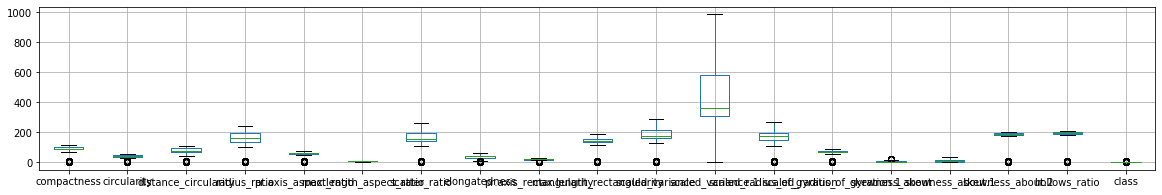

In [508]:
df_car.boxplot(figsize=(20,3))

Very few outliers are left aftre replacing the initial outliers with Mean value. I am ignoring the new outliers which are created by the outlier treatment.

### Preparing data for Model

In [509]:
# Drop class variables
data_new = df_car.drop(['class'], axis =1)

data_new.head()

compactness  circularity  distance_circularity  radius_ratio  \
0    95.000000    48.000000             83.000000    178.000000   
1    91.000000    41.000000             84.000000    141.000000   
2   104.000000    50.000000            106.000000    209.000000   
3    93.000000    41.000000             82.000000    159.000000   
4     8.567376     8.567376              8.567376      8.567376   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0             72.000000                10.000000     162.000000   
1             57.000000                 9.000000     149.000000   
2             66.000000                10.000000     207.000000   
3             63.000000                 9.000000     144.000000   
4              8.567376                 8.567376       8.567376   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0      42.000000               20.000000                 159.000000   
1      45.000000               19.000000                 143.000000   
2      32.000000               23.000000                 158.000000   
3      46.000000               19.000000                 143.000000   
4       8.567376                8.567376                   8.567376   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0       176.000000         379.000000                 184.000000   
1       170.000000         330.000000                 158.000000   
2       223.000000         635.000000                 220.000000   
3       160.000000         309.000000                 127.000000   
4         8.567376           8.567376                   8.567376   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                    70.000000        6.000000         16.000000   
1                    72.000000        9.000000         14.000000   
2                    73.000000       14.000000          9.000000   
3                    63.000000        6.000000         10.000000   
4                     8.567376        8.567376          8.567376   

   skewness_about.2  hollows_ratio  
0        187.000000     197.000000  
1        189.000000     199.000000  
2        188.000000     196.000000  
3        199.000000     207.000000  
4          8.567376       8.567376

In [510]:
# All variables are on same scale, hence we can omit scaling.
# But to standardize the process we will do it here

data_new_z = data_new.apply(zscore)
data_new_z.head()

compactness  circularity  distance_circularity  radius_ratio  \
0     0.222757     0.489351              0.140453      0.349252   
1    -0.025987    -0.336195              0.191560     -0.560472   
2     0.782431     0.725221              1.315899      1.111452   
3     0.098385    -0.336195              0.089347     -0.117904   
4    -5.152136    -4.161142             -3.663523     -3.816607   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              1.197779                 0.899655      -0.063724   
1             -0.269369                 0.414400      -0.375699   
2              0.610920                 0.899655       1.016193   
3              0.317490                 0.414400      -0.495690   
4             -5.006556                 0.204467      -3.745821   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0       0.215439               -0.079392                   0.550027   
1       0.537166               -0.388516                  -0.045659   
2      -0.856981                0.847979                   0.512796   
3       0.644408               -0.388516                  -0.045659   
4      -3.369944               -3.613487                  -5.050636   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0        -0.170468          -0.264926                   0.332376   
1        -0.313766          -0.528677                  -0.288772   
2         0.952033           1.113042                   1.192427   
3        -0.552596          -0.641714                  -1.029371   
4        -4.169260          -2.258848                  -3.858761   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                    -0.018126       -0.093798          0.405262   
1                     0.148266        0.520209          0.177368   
2                     0.231462        1.543554         -0.392367   
3                    -0.600500       -0.093798         -0.278420   
4                    -5.129088        0.431664         -0.441663   

   skewness_about.2  hollows_ratio  
0          0.095666       0.201904  
1          0.162318       0.265730  
2          0.128992       0.169992  
3          0.495576       0.521030  
4         -5.850748      -5.811466

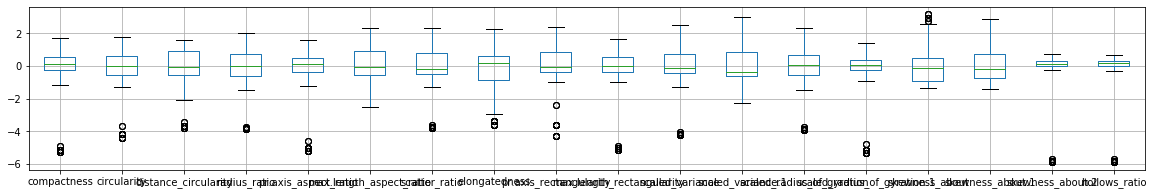

In [511]:
data_new_z.boxplot(figsize=(20,3))

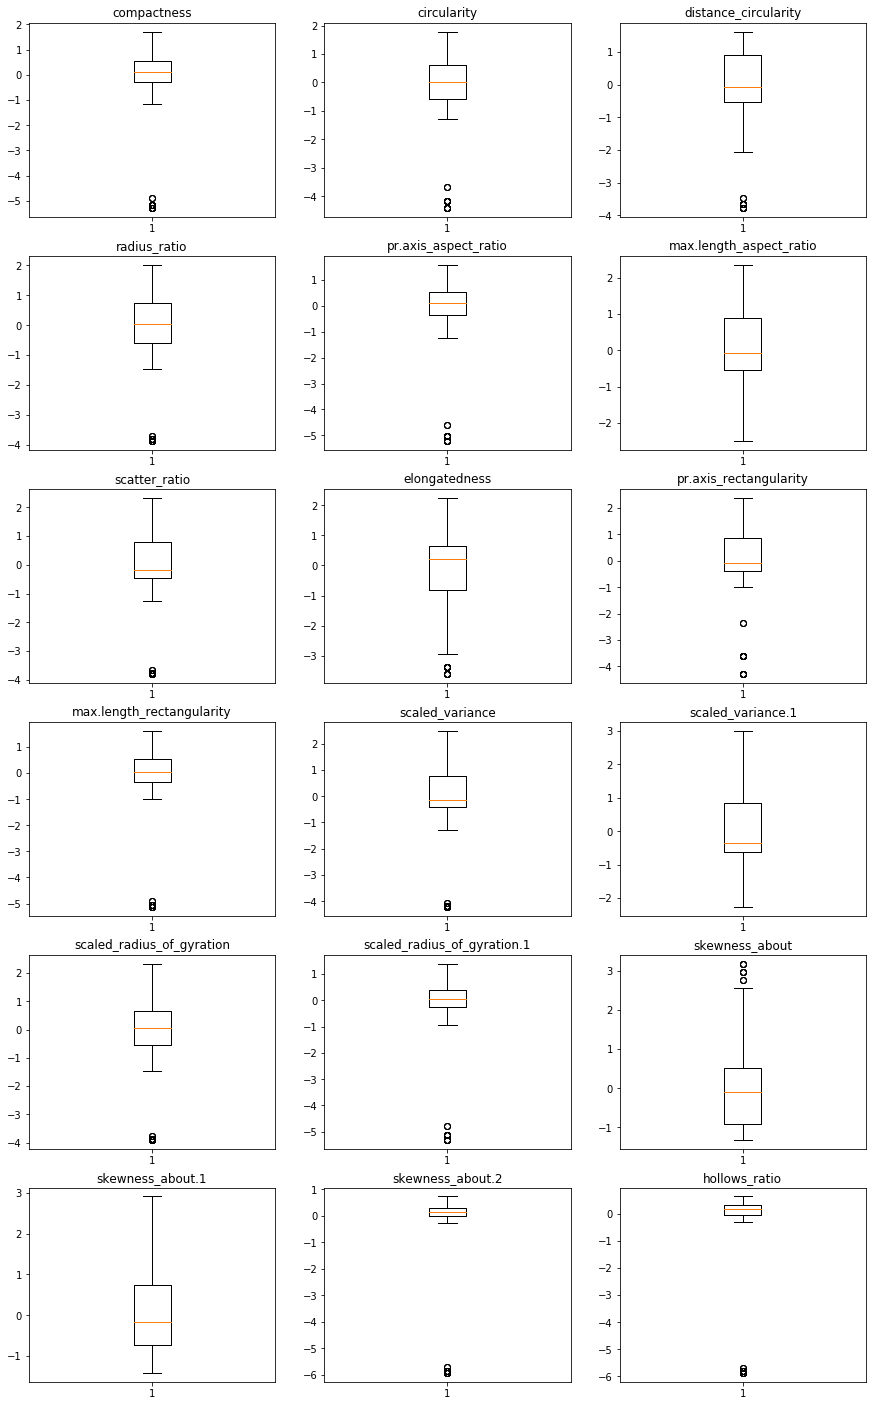

In [512]:
fig, axs = plt.subplots(6, 3, figsize = (15,25))

axs[0, 0].boxplot(data_new_z.compactness)
axs[0, 0].set_title('compactness')

axs[0, 1].boxplot(data_new_z.circularity)
axs[0, 1].set_title('circularity')

axs[0, 2].boxplot(data_new_z.distance_circularity)
axs[0, 2].set_title('distance_circularity')

axs[1, 0].boxplot(data_new_z.radius_ratio)
axs[1, 0].set_title('radius_ratio')

axs[1, 1].boxplot(data_new_z['pr.axis_aspect_ratio'])
axs[1, 1].set_title('pr.axis_aspect_ratio')

axs[1, 2].boxplot(data_new_z['max.length_aspect_ratio'])
axs[1, 2].set_title('max.length_aspect_ratio')

axs[2, 0].boxplot(data_new_z.scatter_ratio)
axs[2, 0].set_title('scatter_ratio')

axs[2, 1].boxplot(data_new_z.elongatedness)
axs[2, 1].set_title('elongatedness')

axs[2, 2].boxplot(data_new_z['pr.axis_rectangularity'])
axs[2, 2].set_title('pr.axis_rectangularity')

axs[3, 0].boxplot(data_new_z['max.length_rectangularity'])
axs[3, 0].set_title('max.length_rectangularity')

axs[3, 1].boxplot(data_new_z.scaled_variance)
axs[3, 1].set_title('scaled_variance')

axs[3, 2].boxplot(data_new_z['scaled_variance.1'])
axs[3, 2].set_title('scaled_variance.1')

axs[4, 0].boxplot(data_new_z.scaled_radius_of_gyration)
axs[4, 0].set_title('scaled_radius_of_gyration')

axs[4, 1].boxplot(data_new_z['scaled_radius_of_gyration.1'])
axs[4, 1].set_title('scaled_radius_of_gyration.1')

axs[4, 2].boxplot(data_new_z.skewness_about)
axs[4, 2].set_title('skewness_about')

axs[5, 0].boxplot(data_new_z['skewness_about.1'])
axs[5, 0].set_title('skewness_about.1')

axs[5, 1].boxplot(data_new_z['skewness_about.2'])
axs[5, 1].set_title('skewness_about.2')

axs[5, 2].boxplot(data_new_z.hollows_ratio)
axs[5, 2].set_title('hollows_ratio')

plt.show()

In [513]:
df_car['class'] = df_car['class'].astype(int) 

### Splitting data into training and test sets (70:30)

In [514]:
X = data_new_z
y = df_car['class']

In [515]:
X.shape

(846, 18)

In [516]:
y.shape

(846,)

In [517]:
X_train, y_train, X_test, y_test = train_test_split(X, y, test_size = 0.3, random_state = 11)

### Performing SVM with all features and different hyper parameters

In [518]:
svm = SVC(random_state = 11)
svm.fit(X_train, X_test)
print(svm.score(X_train, X_test))
print(svm.score(y_train, y_test))

0.9577702702702703
0.9330708661417323


D:\PGP-AIML\Python_Installation\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [519]:
model_comparison.loc[len(model_comparison)] = 'SVM Model with outlier treatment and all features', round(svm.score(X_train, X_test)*100,2), round(svm.score(y_train, y_test)*100,2)

In [520]:
svm = SVC(C= .01, kernel='linear',random_state = 11)
svm.fit(X_train, X_test)

SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=11,
    shrinking=True, tol=0.001, verbose=False)

In [521]:
print(svm.score(X_train, X_test))
print(svm.score(y_train, y_test))

0.8648648648648649
0.8385826771653543


In [522]:
svm = SVC(C= .05, kernel='linear',random_state = 11)
svm.fit(X_train, X_test)
print(svm.score(X_train, X_test))
print(svm.score(y_train, y_test))

0.8902027027027027
0.8661417322834646


In [523]:
svm = SVC(C= .5, kernel='linear',random_state = 11)
svm.fit(X_train, X_test)
print(svm.score(X_train, X_test))
print(svm.score(y_train, y_test))

0.9459459459459459
0.9212598425196851


In [524]:
svm = SVC(kernel='rbf',random_state = 11)
svm.fit(X_train, X_test)
print(svm.score(X_train, X_test))
print(svm.score(y_train, y_test))

0.9577702702702703
0.9330708661417323


D:\PGP-AIML\Python_Installation\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [525]:
svm_gs = GridSearchCV(SVC(),param_grid = params, cv = 5, scoring = 'accuracy')
svm_gs.fit(X_train, X_test)

D:\PGP-AIML\Python_Installation\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
D:\PGP-AIML\Python_Installation\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.01, 0.05, 0.5, 1], 'gamma': ['auto'],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [526]:
svm_gs.best_score_

0.9442567567567568

In [527]:
svm_gs.best_estimator_.C

1

In [528]:
svm_gs.best_estimator_.kernel

'rbf'

In [529]:
svm_gs.score(X_train, X_test)

0.9577702702702703

In [530]:
svm_gs.score(y_train, y_test)

0.9330708661417323

In [531]:
model_comparison.loc[len(model_comparison)] = 'SVM Model without outlier treatment and GridSearch', round(svm_gs.score(X_train, X_test)*100,2), round(svm_gs.score(y_train, y_test)*100,2)

### Choosing features based on corelation and performing SVM again

In [532]:
X_drop = data_new.drop(['circularity','distance_circularity','scatter_ratio','elongatedness','max.length_aspect_ratio','scaled_variance','scaled_variance.1'], axis = 1)

# We found a number of features to have dependencies on each other, we are removing a seven of them.

In [533]:
X_drop.head()

compactness  radius_ratio  pr.axis_aspect_ratio  pr.axis_rectangularity  \
0    95.000000    178.000000             72.000000               20.000000   
1    91.000000    141.000000             57.000000               19.000000   
2   104.000000    209.000000             66.000000               23.000000   
3    93.000000    159.000000             63.000000               19.000000   
4     8.567376      8.567376              8.567376                8.567376   

   max.length_rectangularity  scaled_radius_of_gyration  \
0                 159.000000                 184.000000   
1                 143.000000                 158.000000   
2                 158.000000                 220.000000   
3                 143.000000                 127.000000   
4                   8.567376                   8.567376   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                    70.000000        6.000000         16.000000   
1                    72.000000        9.000000         14.000000   
2                    73.000000       14.000000          9.000000   
3                    63.000000        6.000000         10.000000   
4                     8.567376        8.567376          8.567376   

   skewness_about.2  hollows_ratio  
0        187.000000     197.000000  
1        189.000000     199.000000  
2        188.000000     196.000000  
3        199.000000     207.000000  
4          8.567376       8.567376

In [534]:
X_std_drop = X_drop.apply(zscore)
X_std_drop.head()

compactness  radius_ratio  pr.axis_aspect_ratio  pr.axis_rectangularity  \
0     0.222757      0.349252              1.197779               -0.079392   
1    -0.025987     -0.560472             -0.269369               -0.388516   
2     0.782431      1.111452              0.610920                0.847979   
3     0.098385     -0.117904              0.317490               -0.388516   
4    -5.152136     -3.816607             -5.006556               -3.613487   

   max.length_rectangularity  scaled_radius_of_gyration  \
0                   0.550027                   0.332376   
1                  -0.045659                  -0.288772   
2                   0.512796                   1.192427   
3                  -0.045659                  -1.029371   
4                  -5.050636                  -3.858761   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                    -0.018126       -0.093798          0.405262   
1                     0.148266        0.520209          0.177368   
2                     0.231462        1.543554         -0.392367   
3                    -0.600500       -0.093798         -0.278420   
4                    -5.129088        0.431664         -0.441663   

   skewness_about.2  hollows_ratio  
0          0.095666       0.201904  
1          0.162318       0.265730  
2          0.128992       0.169992  
3          0.495576       0.521030  
4         -5.850748      -5.811466

In [535]:
X_train, y_train, X_test, y_test = train_test_split(X_std_drop, y, test_size = 0.3, random_state = 11)

In [536]:
svm = SVC(random_state = 11)
svm.fit(X_train, X_test)
print(svm.score(X_train, X_test))
print(svm.score(y_train, y_test))

0.9172297297297297
0.8937007874015748


D:\PGP-AIML\Python_Installation\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [537]:
model_comparison.loc[len(model_comparison)] = 'SVM Model with outlier treatment and dropping features', round(svm.score(X_train, X_test)*100,2), round(svm.score(y_train, y_test)*100,2)

In [538]:
svm = SVC(C= .01, kernel='linear',random_state = 11)
svm.fit(X_train, X_test)
print(svm.score(X_train, X_test))
print(svm.score(y_train, y_test))

0.6030405405405406
0.6141732283464567


In [539]:
svm = SVC(C= .05, kernel='linear',random_state = 11)
svm.fit(X_train, X_test)
print(svm.score(X_train, X_test))
print(svm.score(y_train, y_test))

0.785472972972973
0.7992125984251969


In [540]:
svm = SVC(C= .5, kernel='linear',random_state = 11)
svm.fit(X_train, X_test)
print(svm.score(X_train, X_test))
print(svm.score(y_train, y_test))

0.9256756756756757
0.8700787401574803


In [541]:
svm = SVC(kernel='rbf',random_state = 11)
svm.fit(X_train, X_test)
print(svm.score(X_train, X_test))
print(svm.score(y_train, y_test))

0.9172297297297297
0.8937007874015748


D:\PGP-AIML\Python_Installation\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [542]:
svm_gs = GridSearchCV(SVC(),param_grid = params, cv = 5, scoring = 'accuracy')
svm_gs.fit(X_train, X_test)

D:\PGP-AIML\Python_Installation\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
D:\PGP-AIML\Python_Installation\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.01, 0.05, 0.5, 1], 'gamma': ['auto'],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [543]:
svm_gs.best_score_

0.9172297297297297

In [544]:
svm_gs.best_estimator_.C

1

In [545]:
svm_gs.best_estimator_.kernel

'linear'

In [546]:
svm_gs.score(X_train, X_test)

0.9324324324324325

In [547]:
svm_gs.score(y_train, y_test)

0.8937007874015748

In [548]:
model_comparison.loc[len(model_comparison)] = 'SVM Model without outlier treatment and GridSearch', round(svm_gs.score(X_train, X_test)*100,2), round(svm_gs.score(y_train, y_test)*100,2)

# Performing PCA

In [549]:
# PCA
# Step 1 - Create covariance matrix

cov_matrix = np.cov(data_new_z.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00118343e+00  8.52528794e-01  8.45160702e-01  8.43387587e-01
   7.84212691e-01  2.45844057e-01  8.60186910e-01  1.65651079e-01
   8.54326899e-01  9.13828681e-01  8.88689282e-01  7.06333668e-01
   7.84172468e-01  6.78114879e-01  6.48760866e-02  1.44738375e-01
   8.77496375e-01  8.84873207e-01]
 [ 8.52528794e-01  1.00118343e+00  8.77512291e-01  8.04641511e-01
   6.72643589e-01  4.00399906e-01  9.11172605e-01 -8.21928768e-02
   9.07148729e-01  9.59873940e-01  9.02208847e-01  8.19123376e-01
   9.58257706e-01  6.25693111e-01  6.25783884e-02  4.91475404e-02
   6.71745564e-01  6.91056559e-01]
 [ 8.45160702e-01  8.77512291e-01  1.00118343e+00  8.87219642e-01
   6.25787173e-01  5.21770144e-01  9.43422470e-01 -2.41582528e-01
   9.33619399e-01  8.46383172e-01  9.30693632e-01  8.83950906e-01
   8.24744190e-01  4.33114904e-01  5.16816020e-02  2.54744196e-01
   6.24269168e-01  6.58878032e-01]
 [ 8.43387587e-01  8.04641511e-01  8.87219642e-01  1.00118343e+00
   8.15693693e-

In [550]:
# Step 2- Get eigen values and eigen vector
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[ 2.83683041e-01 -9.43592802e-02  1.74696077e-02  1.02518758e-01
  -1.76510444e-02  5.78809236e-02 -3.82918243e-01 -3.35929806e-02
  -4.69350821e-01  6.15993690e-01  3.34409714e-01  6.20216190e-02
  -1.70728254e-01 -2.67083615e-02 -2.93973972e-02  2.86954987e-02
  -3.64096870e-02 -9.93029923e-03]
 [ 2.83454469e-01  5.41658025e-02  1.53871111e-01 -8.89807488e-02
  -9.11444503e-03 -1.91823990e-01  2.56319534e-01 -3.40139402e-01
  -2.20294208e-01 -2.47750412e-01  2.97157503e-01 -7.99594077e-02
   2.57312349e-01 -1.04419747e-02  1.27232102e-02  5.20673489e-01
  -2.95972784e-01 -1.92521376e-01]
 [ 2.78619203e-01  1.57537834e-01 -5.28185396e-02  7.23804233e-02
  -9.22988250e-02  9.28135938e-03 -1.55126083e-01 -5.97145964e-02
   7.35500022e-01  7.91474542e-02  4.69584870e-01 -2.46034703e-01
  -1.26869870e-01  3.22663684e-02  3.97844951e-02  1.33136331e-02
  -3.11924017e-02  7.17743670e-02]
 [ 2.70367165e-01  7.44446369e-02 -8.89879033e-02  5.38858869e-02
  -1.53751171e-01  

In [551]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 61.88177086  78.00739311  84.10803861  89.5338057   93.77673262
  96.89913349  98.1410987   98.84605822  99.18790185  99.39800115
  99.57818583  99.73646247  99.82157949  99.88208988  99.93309237
  99.97449188  99.99123812 100.        ]


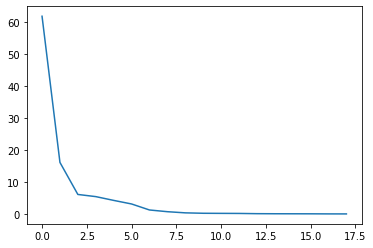

In [552]:
plt.plot(var_exp)

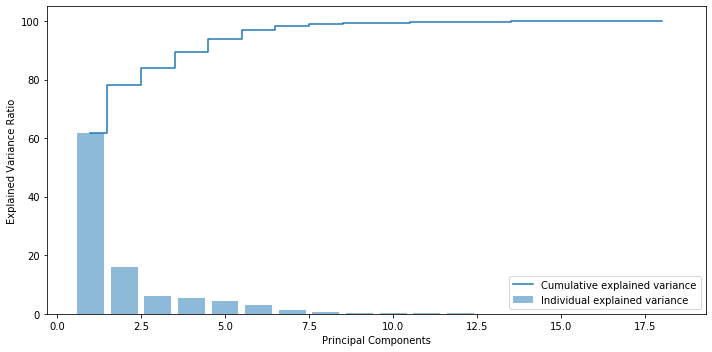

In [553]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [554]:
# Using scikit learn PCA here. It does all the above steps and maps data to PCA dimensions in one shot

# NOTE - we are generating only 8 PCA dimensions (dimensionality reduction from 17 to 8)

pca = PCA(n_components=8)
data_reduced = pca.fit_transform(data_new_z)
data_reduced.transpose()

array([[-0.88837228,  0.60795631, -2.98944294, ..., -3.69290186,
         1.69585374,  2.63718457],
       [-0.22837638, -0.54455117,  1.56331151, ...,  1.97152608,
        -1.2837337 , -2.46190566],
       [ 0.18071564, -0.21303411, -1.35463054, ..., -0.36469997,
         2.06252725,  1.2986567 ],
       ...,
       [-0.18339286, -0.59542923,  0.44267053, ...,  0.10968023,
        -0.20816989, -0.38004665],
       [ 1.0262285 , -0.2875267 ,  0.17991282, ..., -0.2142936 ,
        -0.05521227, -0.25430803],
       [-0.02515371, -0.06474507, -0.36156563, ..., -0.48478858,
         0.47076041,  0.38787966]])

In [555]:
pca.components_

array([[-0.28368304, -0.28345447, -0.2786192 , -0.27036717, -0.23563864,
        -0.10080205, -0.28547912,  0.00144661, -0.28298132, -0.28677165,
        -0.28925451, -0.2489887 , -0.2694958 , -0.20072284, -0.00569675,
        -0.05092944, -0.24022414, -0.24501409],
       [-0.09435928,  0.0541658 ,  0.15753783,  0.07444464, -0.23807416,
         0.34059147,  0.14798144, -0.56357018,  0.15125902, -0.07117394,
         0.08294665,  0.29233926,  0.06352431, -0.32484689,  0.09844134,
         0.10838382, -0.32399973, -0.29891251],
       [-0.01746961, -0.15387111,  0.05281854,  0.0889879 ,  0.0546976 ,
        -0.0635922 ,  0.03497927, -0.01895746,  0.02606363, -0.10399787,
         0.05405098,  0.02797104, -0.20279959, -0.04229815, -0.62279223,
         0.71123702,  0.04076933,  0.05643719],
       [ 0.10251876, -0.08898075,  0.07238042,  0.05388589,  0.05144202,
         0.25557741, -0.07428847,  0.16187924, -0.06059787, -0.02430917,
        -0.09205575, -0.12426425, -0.15688068, -0.164

In [556]:
print(pca.explained_variance_ratio_)

[0.61881771 0.16125622 0.06100645 0.05425767 0.04242927 0.03122401
 0.01241965 0.0070496 ]


In [557]:
X = pca.transform(data_new_z)

### Splitting PCA generated data into training and test sets (70:30)

In [558]:
X_train, y_train, X_test, y_test = train_test_split(X, y, test_size = 0.3, random_state = 11)

### Performing SVM on PCA generated data

In [559]:
svm = SVC()
svm.fit(X_train, X_test)
print(svm.score(X_train, X_test))
print(svm.score(y_train, y_test))

0.9611486486486487
0.9173228346456693


D:\PGP-AIML\Python_Installation\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [560]:
model_comparison.loc[len(model_comparison)] = 'SVM Model with outliers treatment and PCA', round(svm.score(X_train, X_test)*100,2), round(svm.score(y_train, y_test)*100,2)

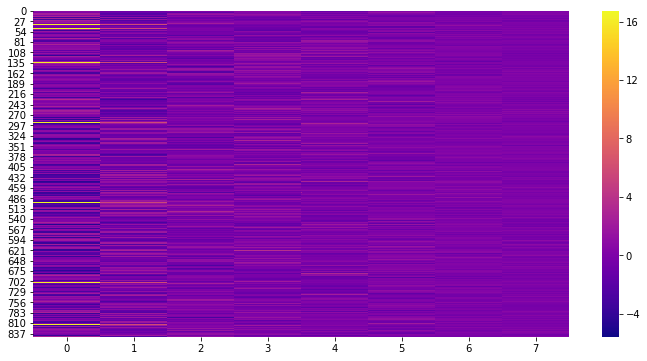

In [561]:
plt.figure(figsize=(12,6))
sns.heatmap(data_reduced,cmap='plasma')

In [562]:
svm = SVC(C= .01, kernel='linear',random_state = 11)
svm.fit(X_train, X_test)
print(svm.score(X_train, X_test))
print(svm.score(y_train, y_test))

0.8361486486486487
0.8307086614173228


In [563]:
svm = SVC(C= .05, kernel='linear',random_state = 11)
svm.fit(X_train, X_test)
print(svm.score(X_train, X_test))
print(svm.score(y_train, y_test))

0.8496621621621622
0.8503937007874016


In [564]:
svm = SVC(C= .5, kernel='linear',random_state = 11)
svm.fit(X_train, X_test)
print(svm.score(X_train, X_test))
print(svm.score(y_train, y_test))

0.8902027027027027
0.8740157480314961


In [565]:
svm = SVC(kernel='rbf',random_state = 11)
svm.fit(X_train, X_test)
print(svm.score(X_train, X_test))
print(svm.score(y_train, y_test))

0.9611486486486487
0.9173228346456693


D:\PGP-AIML\Python_Installation\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [566]:
svm_gs = GridSearchCV(SVC(),param_grid = params, cv = 5, scoring = 'accuracy')
svm_gs.fit(X_train, X_test)

D:\PGP-AIML\Python_Installation\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
D:\PGP-AIML\Python_Installation\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.01, 0.05, 0.5, 1], 'gamma': ['auto'],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [567]:
svm_gs.best_score_

0.9476351351351351

In [568]:
svm_gs.best_estimator_.C

1

In [569]:
svm_gs.score(X_train, X_test)

0.9611486486486487

In [570]:
svm_gs.score(y_train, y_test)

0.9173228346456693

In [571]:
model_comparison.loc[len(model_comparison)] = 'SVM Model with Outlier Treatment, PCA and GridSearch', round(svm_gs.score(X_train, X_test)*100,2), round(svm_gs.score(y_train, y_test)*100,2)

### Comparison of results of different models

In [572]:
model_comparison

Model Type  Training Score  \
0   SVM Model with outlier treatment and dropping ...           97.30   
1   SVM Model without outlier treatment and GridSe...           97.30   
2   SVM Model without outlier treatment and droppi...           96.62   
3   SVM Model without outlier treatment, dropping ...           96.62   
4         SVM Model without outlier treatment and PCA           97.13   
5   SVM Model without outlier treatment, PCA and G...           97.13   
6   SVM Model with outlier treatment and all features           95.78   
7   SVM Model without outlier treatment and GridSe...           95.78   
8   SVM Model with outlier treatment and dropping ...           91.72   
9   SVM Model without outlier treatment and GridSe...           93.24   
10          SVM Model with outliers treatment and PCA           96.11   
11  SVM Model with Outlier Treatment, PCA and Grid...           96.11   

    Test Score  
0        96.46  
1        96.46  
2        94.09  
3        94.09  
4        94.88  
5        94.88  
6        93.31  
7        93.31  
8        89.37  
9        89.37  
10       91.73  
11       91.73

Conclusion: 

By implementing PCA on data without outlier treatment (Model 4-5), we have used only 8 components out of 18 input features with almost same accuracy in training and test data than using the whole dataset of 18 components.
We have removed all the dependencies between input features. 
This model might be performing better in production